# Importing Libraries

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from keras.preprocessing import image
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
import urllib.request
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam

# Read Data

In [44]:
image_path="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"

In [45]:
train_path="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
valid_path="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"
test_path="../input/new-plant-diseases-dataset/test/"

# Visualize Images

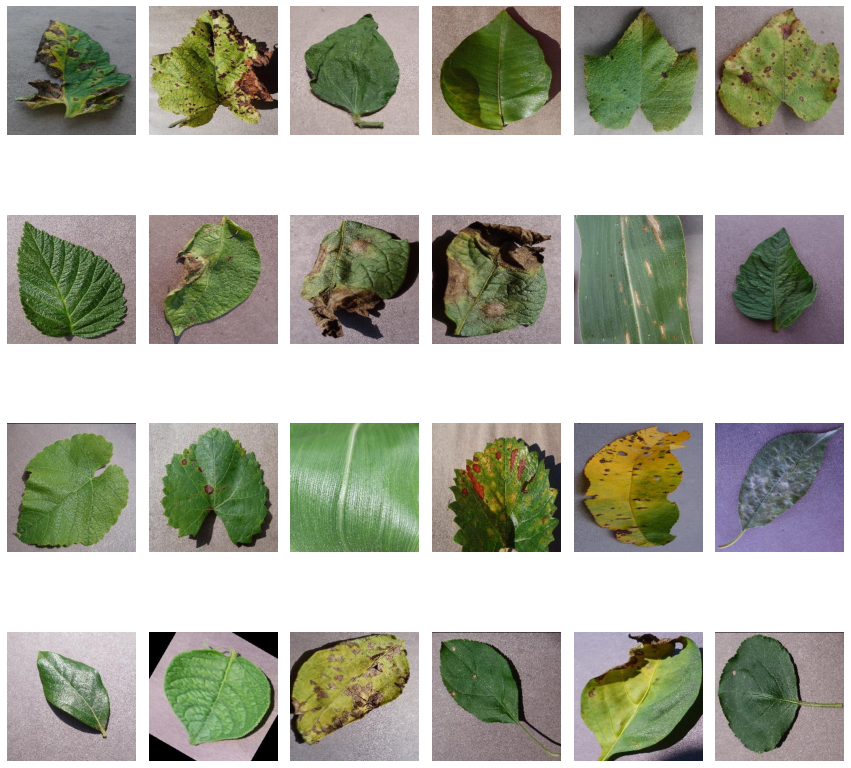

In [46]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(24):
    random_folder=np.random.randint(0,len(os.listdir(image_path)))
    random_folder_path=os.path.join(image_path,os.listdir(image_path)[random_folder])
    random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
    random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])
    image=cv2.imread(random_image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.subplot(4,6,i+1)
    plt.imshow(image)
    plt.axis("off")
plt.show()

# Class Description

In [47]:
class_names = os.listdir(image_path)
print(class_names)

['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato__

In [48]:
print("Number of classes : {}".format(len(class_names)))

Number of classes : 38


Number of images in each class

In [49]:
number_of_images = {}
for class_name in class_names:
    number_of_images[class_name] = len(os.listdir(image_path+"/"+class_name))
    
images_each_class = pd.DataFrame(list(number_of_images.items()), columns=['Class Name', 'Number of Images'])


In [50]:
images_each_class

Class Name  Number of Images
0                                Tomato___Late_blight              1851
1                                    Tomato___healthy              1926
2                                     Grape___healthy              1692
3            Orange___Haunglongbing_(Citrus_greening)              2010
4                                   Soybean___healthy              2022
5                             Squash___Powdery_mildew              1736
6                                    Potato___healthy              1824
7                 Corn_(maize)___Northern_Leaf_Blight              1908
8                               Tomato___Early_blight              1920
9                         Tomato___Septoria_leaf_spot              1745
10  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...              1642
11                           Strawberry___Leaf_scorch              1774
12                                    Peach___healthy              1728
13                                 Apple___Apple_scab              2016
14             Tomato___Tomato_Yellow_Leaf_Curl_Virus              1961
15                            Tomato___Bacterial_spot              1702
16                                  Apple___Black_rot              1987
17                                Blueberry___healthy              1816
18           Cherry_(including_sour)___Powdery_mildew              1683
19                             Peach___Bacterial_spot              1838
20                           Apple___Cedar_apple_rust              1760
21                               Tomato___Target_Spot              1827
22                             Pepper,_bell___healthy              1988
23         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)              1722
24                               Potato___Late_blight              1939
25                       Tomato___Tomato_mosaic_virus              1790
26                               Strawberry___healthy              1824
27                                    Apple___healthy              2008
28                                  Grape___Black_rot              1888
29                              Potato___Early_blight              1939
30                  Cherry_(including_sour)___healthy              1826
31                        Corn_(maize)___Common_rust_              1907
32                       Grape___Esca_(Black_Measles)              1920
33                                Raspberry___healthy              1781
34                                 Tomato___Leaf_Mold              1882
35      Tomato___Spider_mites Two-spotted_spider_mite              1741
36                      Pepper,_bell___Bacterial_spot              1913
37                             Corn_(maize)___healthy              1859

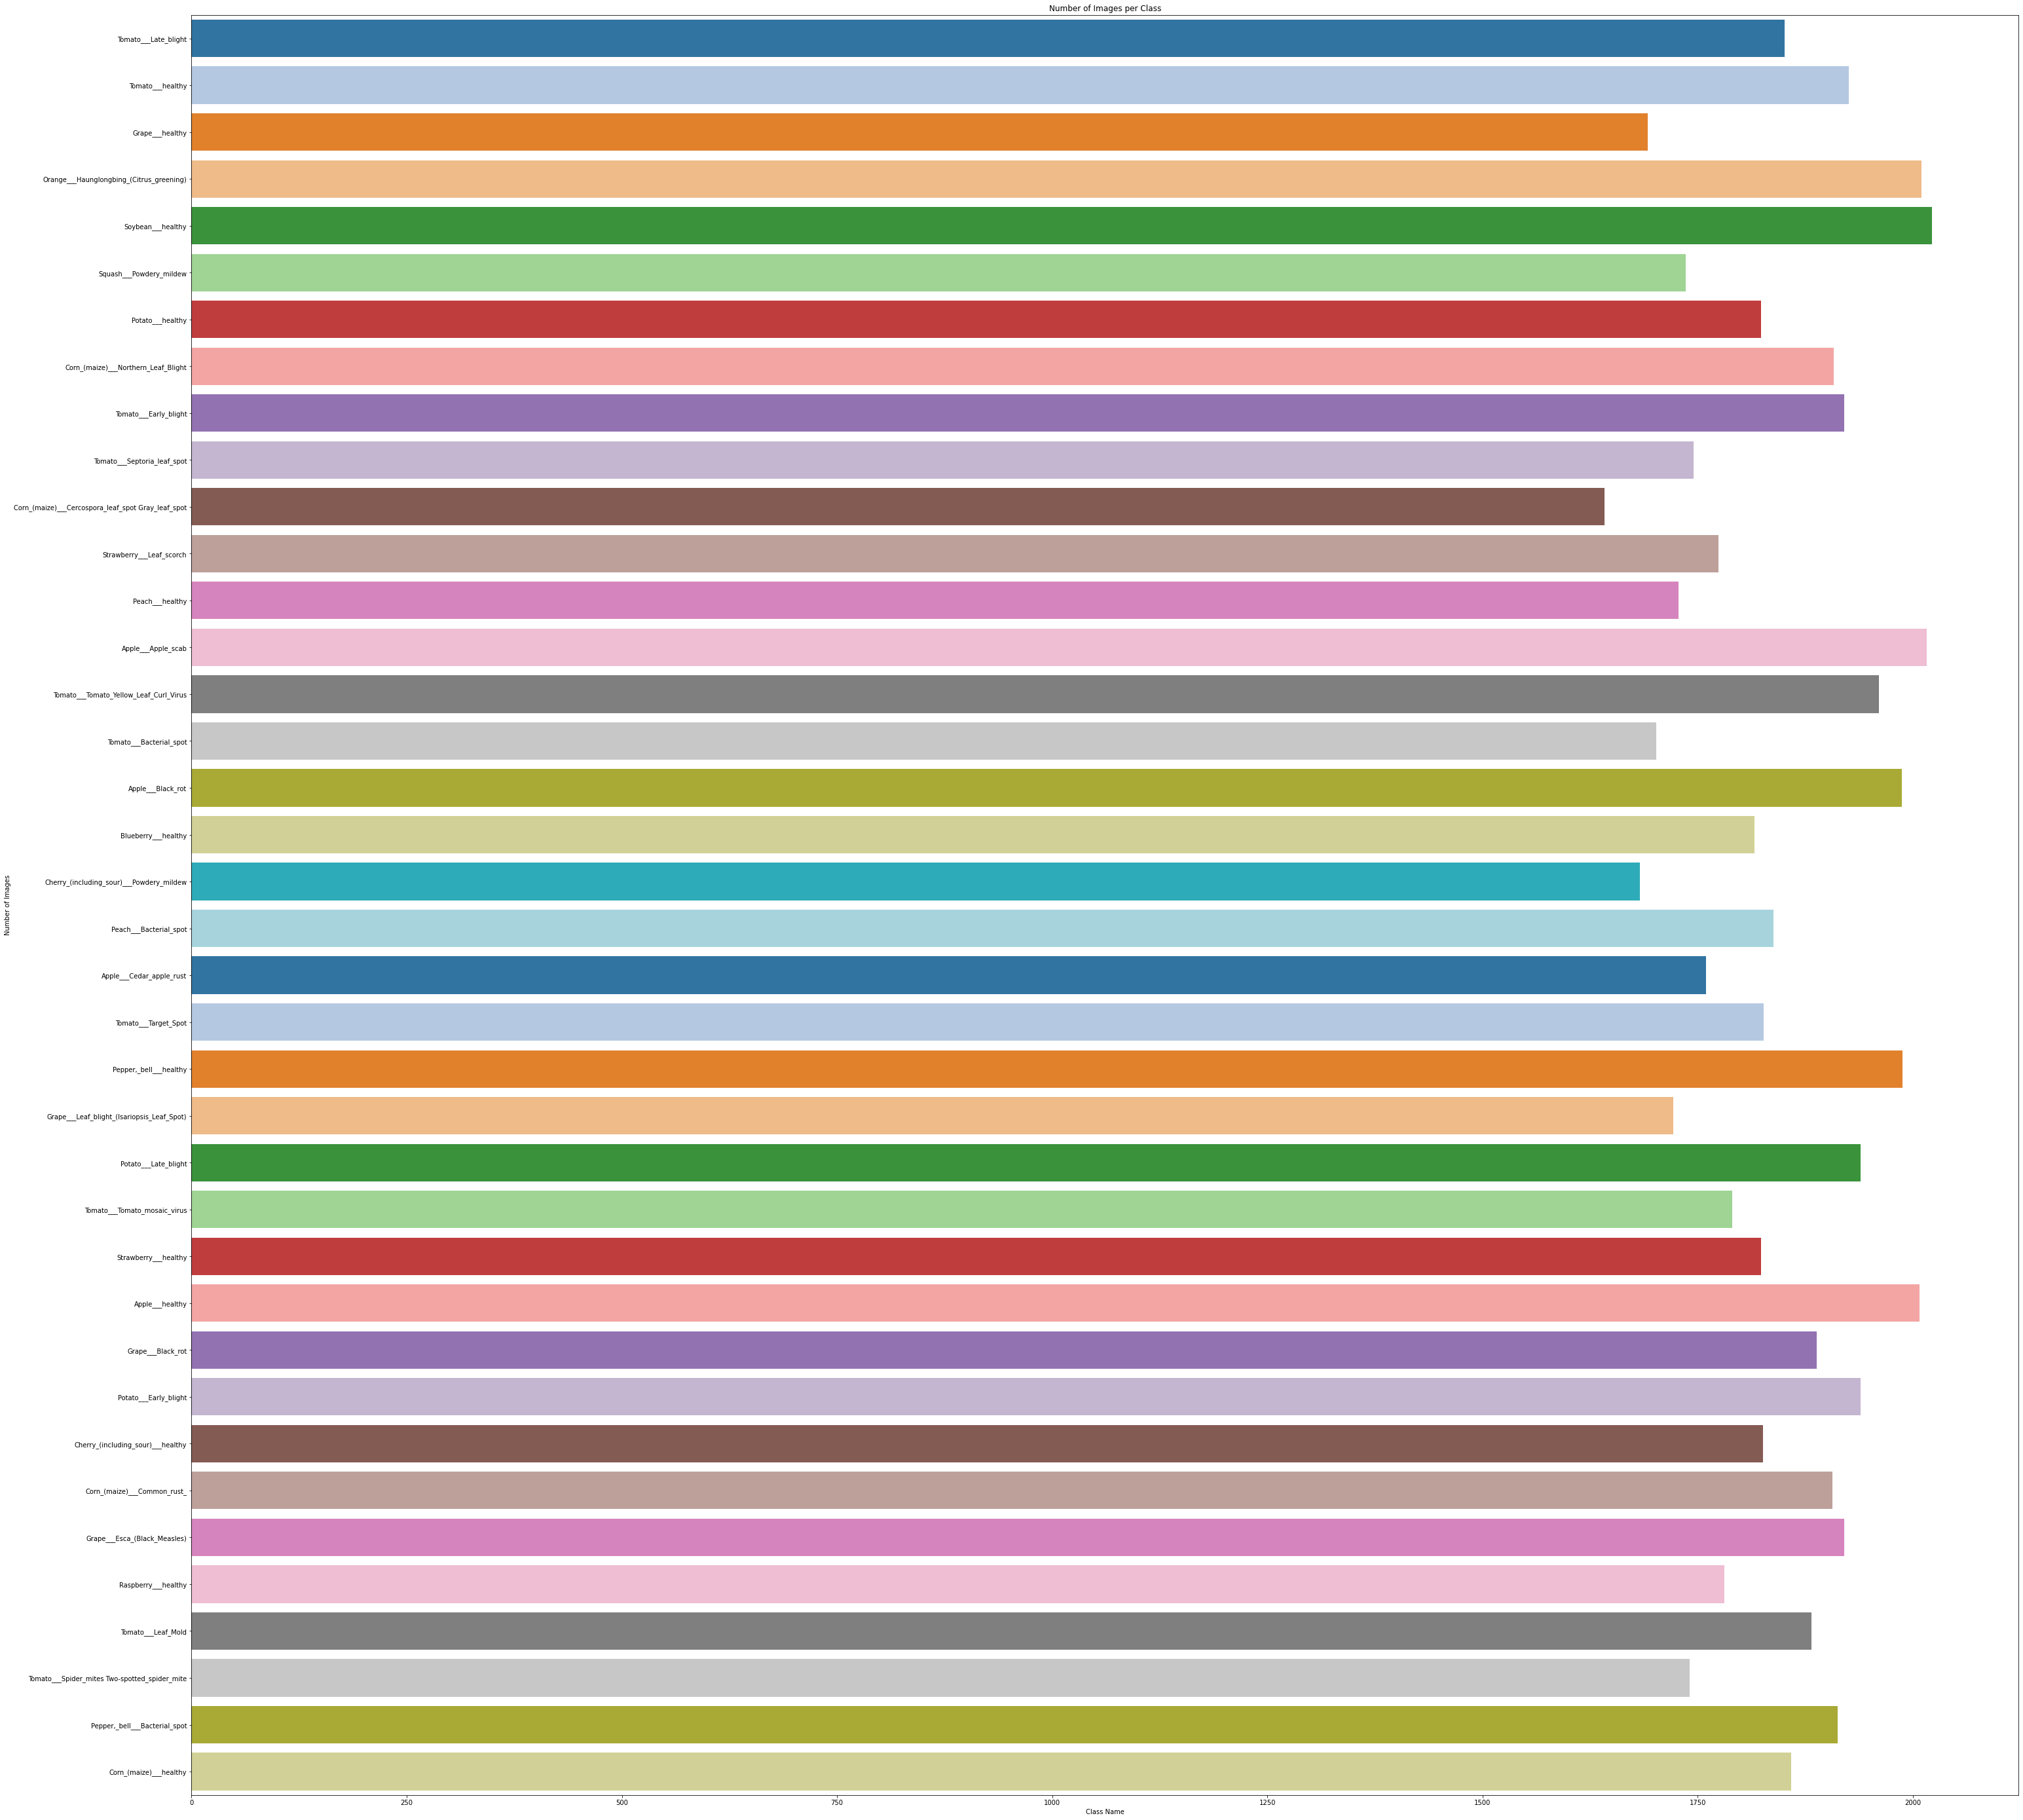

In [51]:
plt.figure(figsize=(50,50))
sns.barplot(y='Class Name', x='Number of Images', data=images_each_class,palette="tab20")
plt.title('Number of Images per Class')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.show()

In [52]:
batch_size=20

train_data,valid_data and test_data Generator

In [53]:
traindata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
                                                                    shear_range=0.2, horizontal_flip=True,validation_split=0.2,fill_mode='nearest')

validdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [54]:
train_data_generator=traindata_generator.flow_from_directory(train_path,batch_size=batch_size,class_mode="categorical",
                                                        target_size=(224,224),color_mode="rgb",shuffle=True )

Found 70295 images belonging to 38 classes.


In [55]:
valid_data_generator=validdata_generator.flow_from_directory(train_path,batch_size=batch_size,class_mode="categorical",
                                                        target_size=(224,224),color_mode="rgb",shuffle=True)

Found 70295 images belonging to 38 classes.


In [56]:
test_data_generator=testdata_generator.flow_from_directory(valid_path,batch_size=batch_size,class_mode="categorical",
                                                            target_size=(224,224),color_mode="rgb",shuffle=False )

Found 17572 images belonging to 38 classes.


In [57]:
class_dict = train_data_generator.class_indices
class_list = list(class_dict.keys())
class_list

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [58]:
train_number=train_data_generator.samples
valid_number=valid_data_generator.samples

# Create MobileNet Model

In [59]:
mobilenetV2_model= tf.keras.applications.MobileNetV2(weights='imagenet',classes=38,include_top=False, input_shape=(224,224, 3))
x= mobilenetV2_model.output
x= GlobalAveragePooling2D()(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.2)(x)
prediction= Dense(38, activation = 'softmax')(x)
model= Model(inputs= mobilenetV2_model.input, outputs= prediction)

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary() 

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [60]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

# Fitting Into Model

In [61]:
history= model.fit(train_data_generator, 
                   steps_per_epoch=train_number//batch_size, 
                   validation_data= valid_data_generator, 
                   validation_steps= valid_number//batch_size,
                   shuffle=True, 
                   
                   epochs =12, 
                   
                   
                   
                   batch_size = 20,callbacks=[callback])

Epoch 1/12
3514/3514 [==============================] - 1797s 507ms/step - loss: 0.4295 - accuracy: 0.8682 - val_loss: 2.4468 - val_accuracy: 0.5970
Epoch 2/12
3514/3514 [==============================] - 1178s 335ms/step - loss: 0.2298 - accuracy: 0.9278 - val_loss: 4.1322 - val_accuracy: 0.4698
Epoch 3/12
3514/3514 [==============================] - 1190s 339ms/step - loss: 0.1625 - accuracy: 0.9488 - val_loss: 1.0550 - val_accuracy: 0.7739
Epoch 4/12
3514/3514 [==============================] - 1201s 342ms/step - loss: 0.1333 - accuracy: 0.9580 - val_loss: 1.1381 - val_accuracy: 0.7630
Epoch 5/12
3514/3514 [==============================] - 1199s 341ms/step - loss: 0.1121 - accuracy: 0.9643 - val_loss: 1.7732 - val_accuracy: 0.6858
Epoch 6/12
3514/3514 [==============================] - 1188s 338ms/step - loss: 0.0949 - accuracy: 0.9699 - val_loss: 0.8133 - val_accuracy: 0.8539
Epoch 7/12
3514/3514 [==============================] - 1181s 336ms/step - loss: 0.0857 - accuracy: 0.9737

# Summarize History For Accuracy

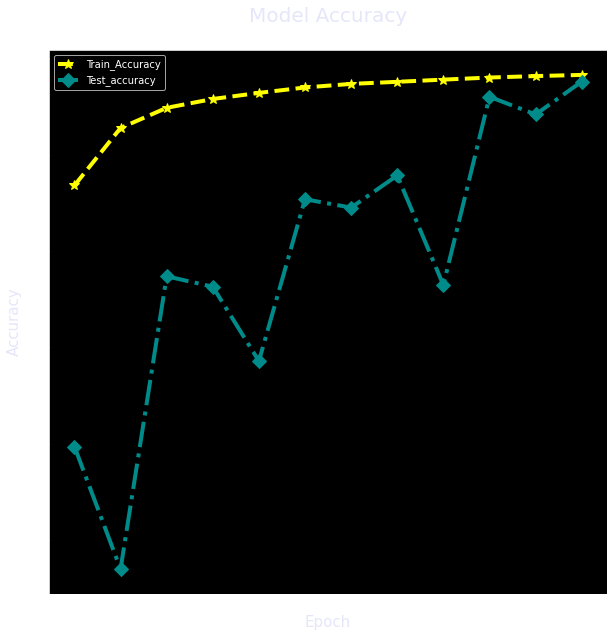

In [62]:
# summarize history for accuracy
plt.figure(figsize=(10,10))
plt.style.use("dark_background")
plt.plot(history.history['accuracy'],marker="*",linestyle="--",color="yellow",markersize=10,lw=4)
plt.plot(history.history['val_accuracy'],marker="D",linestyle="-.",color="darkcyan",markersize=10,lw=4)
plt.title('Model Accuracy\n',color="lavender",fontsize=20)
plt.ylabel('Accuracy',color="lavender",fontsize=15)
plt.xlabel('Epoch',color="lavender",fontsize=15)
plt.legend(['Train_Accuracy', 'Test_accuracy'], loc='upper left')
plt.show()


# Summarize History For Loss

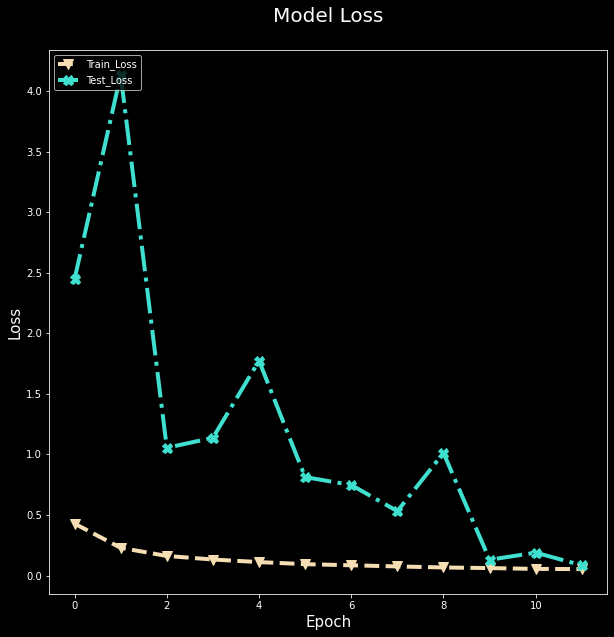

In [63]:
# summarize history for loss
plt.figure(figsize=(10,10))
plt.style.use("dark_background")
plt.plot(history.history['loss'],marker="v",linestyle="--",color="wheat",markersize=10,lw=4)
plt.plot(history.history['val_loss'],marker="X",linestyle="-.",color="turquoise",markersize=10,lw=4)
plt.title('Model Loss\n',color="snow",fontsize=20)
plt.ylabel('Loss',color="snow",fontsize=15)
plt.xlabel('Epoch',color="snow",fontsize=15)
plt.legend(['Train_Loss', 'Test_Loss'], loc='upper left')
plt.show()


# Save And Load Model

In [ ]:
# Assuming your model object is called 'model'
model.save('my_model.h6')
model = load_model('my_model.h6')


In [ ]:
pred=model.predict(test_data_generator,steps=valid_number//batch_size)
final_predict=np.argmax(pred,axis=1)
true_data=test_data_generator.classes

# Accuracy Score

In [66]:
print("Accuracy Score is",accuracy_score(true_data,final_predict))

Accuracy Score is 0.9724561802868199


# ROC AUC Score

In [67]:
print("ROC AUC Score is {}".format(roc_auc_score(true_data, pred,multi_class='ovr')))

ROC AUC Score is 0.9998652872227779


# Average Precision Score

In [68]:

# true_data: true labels
# pred: predicted labels

# convert true labels to binary format
num_classes = len(set(true_data))
true_data_bin = label_binarize(true_data, classes=range(num_classes))

# calculate average precision score for each class
avg_precisions = []
for class_idx in range(num_classes):
    y_true = true_data_bin[:, class_idx]
    y_pred = pred[:, class_idx]
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    avg_precisions.append(average_precision_score(y_true, y_pred))
    
# calculate the final score as the average of all class scores
macro_avg_precision = sum(avg_precisions) / num_classes

macro_avg_precision 

0.99667859000387

# Compute The F1 Score For Each Threshold Value

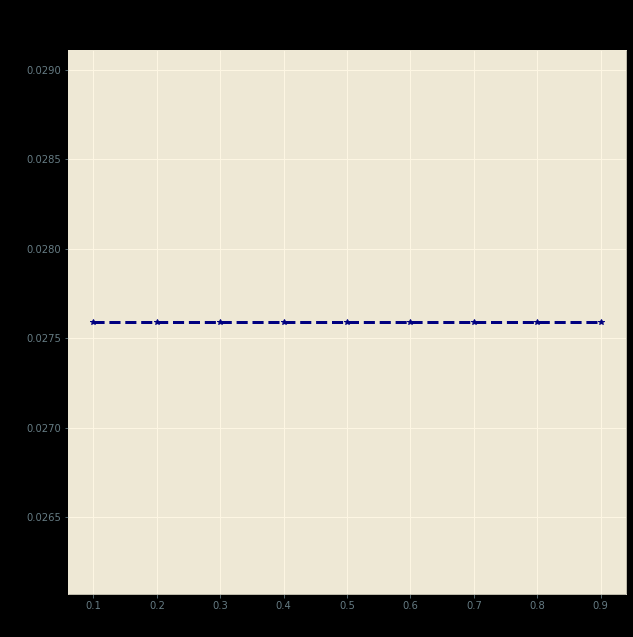

In [69]:

plt.figure(figsize=(10,10))
plt.style.use('Solarize_Light2')
# Compute the F1 score for each threshold value
y_pred = model.predict(test_data_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true=test_data_generator.classes
f1_scores = []
thresholds = np.arange(0.1, 1.0, 0.1)
for threshold in thresholds:
    y_pred_threshold = (y_pred >= threshold).astype(int)
    f1_scores.append(f1_score(y_true, y_pred_threshold, average='macro'))

# Plot the F1 score curve
plt.plot(thresholds, f1_scores,color="navy",marker="*",linestyle="--",linewidth=3)
plt.xlabel('Threshold',color="black",fontsize=15)
plt.ylabel('F1 Score',color="black",fontsize=15)
plt.title('F1 Score Curve\n',fontsize=20,color="black")
plt.show()


#  Plot Precision-Recall curve

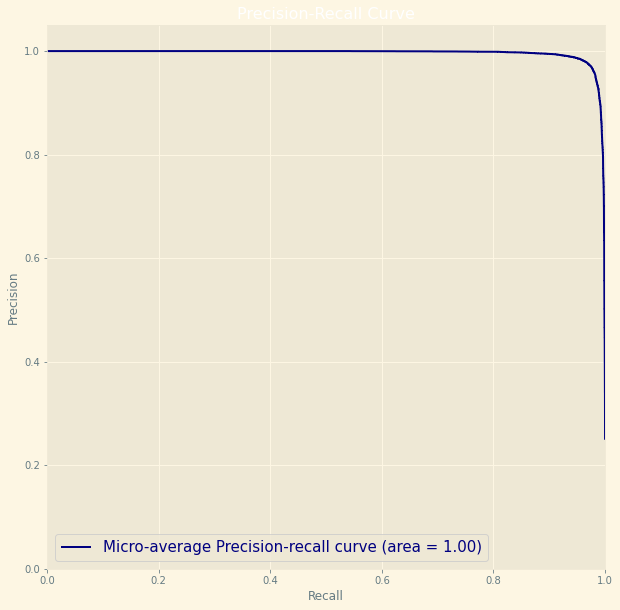

In [70]:
binarize_label = label_binarize(true_data, classes=range(num_classes))
my_class = binarize_label.shape[1]
# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()

for i in range(my_class):
    precision[i],recall[i], _ = precision_recall_curve(binarize_label[:,i],pred[:,i])
    average_precision[i]=average_precision_score(binarize_label[:,i],pred[:,i])
    
precision["micro"],recall["micro"], _ =precision_recall_curve(binarize_label.ravel(),pred.ravel())
average_precision["micro"]=average_precision_score(binarize_label,pred,average="micro")
                                                                  
# Plot Precision-Recall curve
plt.figure(figsize=(10,10))
plt.plot(recall["micro"], precision["micro"], label='Micro-average Precision-recall curve (area = {0:0.2f})'.format(average_precision["micro"]), linewidth=2, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left",fontsize=15,labelcolor="navy")
plt.show()


#  Plot Precision-Recall curve for each class

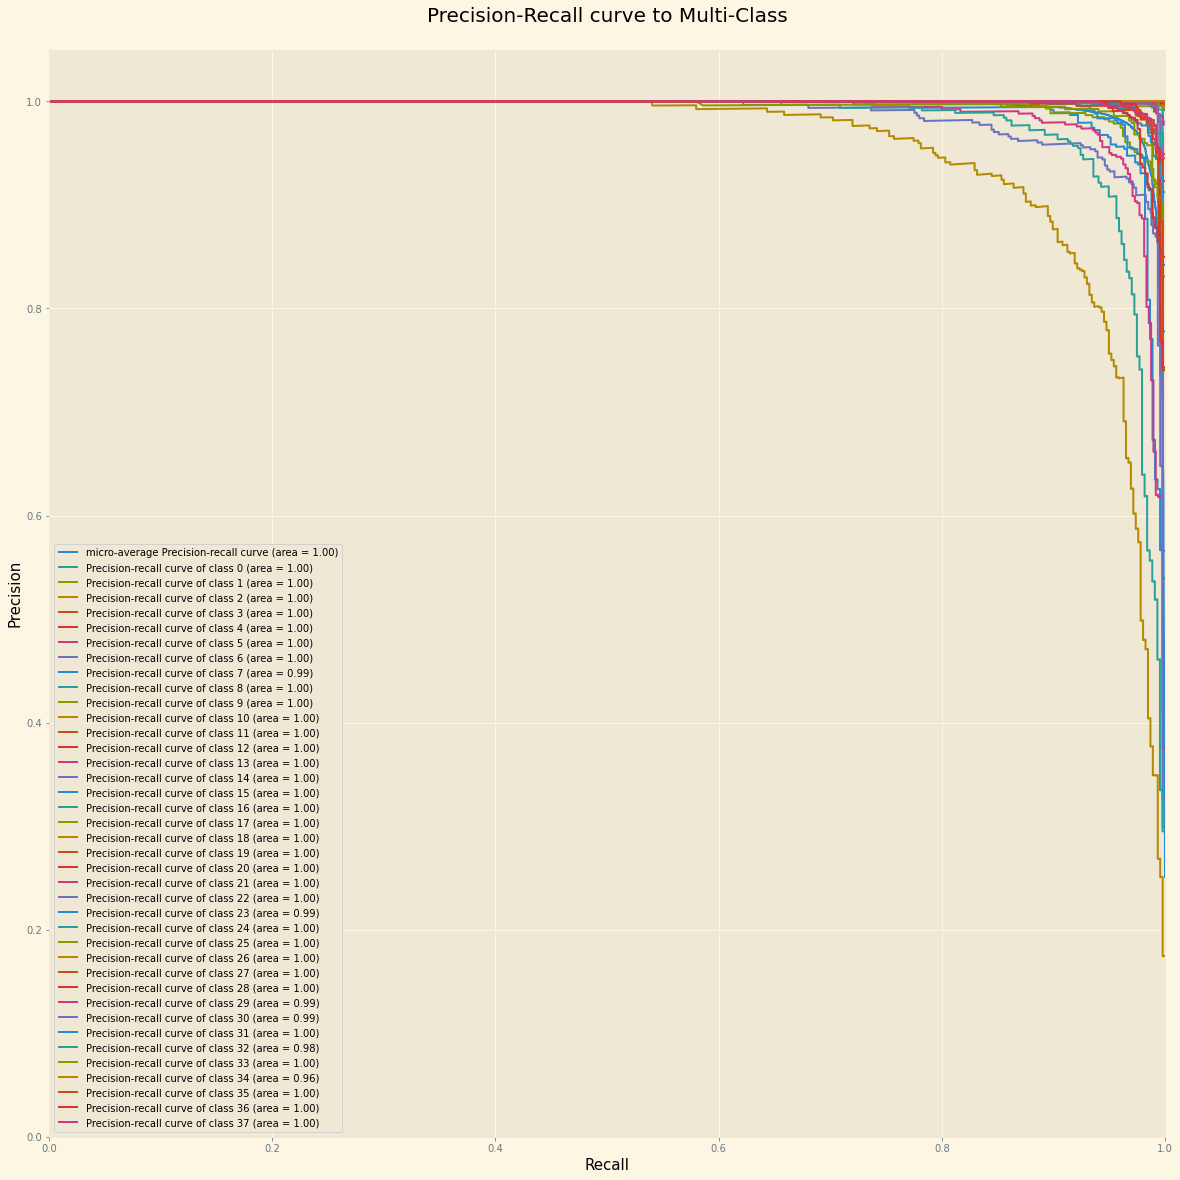

In [71]:
plt.figure(figsize=(20,20))
plt.plot(recall["micro"], precision["micro"],label='micro-average Precision-recall curve (area = {0:0.2f})' ''.format(average_precision["micro"]))
for i in range(my_class):
    plt.plot(recall[i], precision[i],label='Precision-recall curve of class {0} (area = {1:0.2f})' ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall',fontsize=15,color="black")
plt.ylabel('Precision',fontsize=15,color="black")
plt.title('Precision-Recall curve to Multi-Class\n',fontsize=20,color="black")
plt.legend(loc="best",labelcolor="black")
plt.show()

#  Receiver Operating Characteristic (Micro-Averaged)

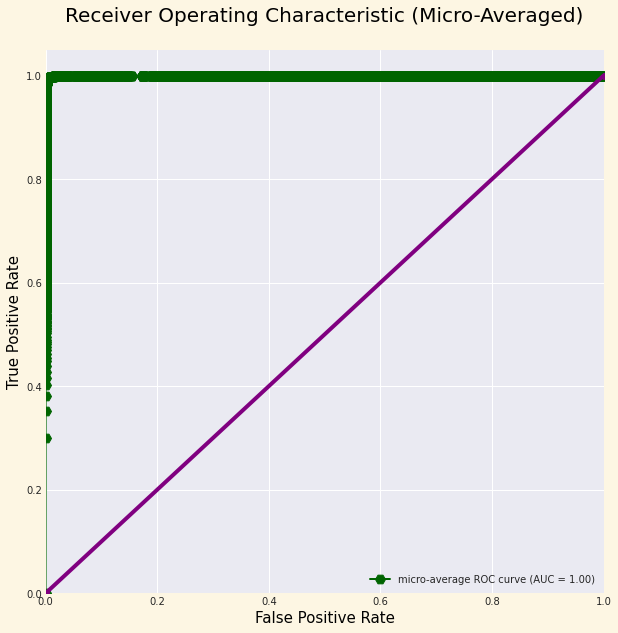

In [72]:
# Evaluate the model on the test data
test_steps = valid_number // batch_size
y_pred = model.predict(test_data_generator,test_steps)

# Compute the one-hot encoded class labels
y_true_onehot = tf.keras.utils.to_categorical(y_true)

# Compute the micro-averaged ROC curve and AUC score
fpr_micro, tpr_micro, thresholds_micro = roc_curve(y_true_onehot.ravel(), y_pred.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)


# Plot the micro-averaged ROC curve
plt.figure(figsize=(10,10))
plt.style.use("seaborn-darkgrid")
plt.plot(fpr_micro, tpr_micro, color='darkgreen', lw=2,marker="H",markersize=10, label='micro-average ROC curve (AUC = %0.2f)' % roc_auc_micro)
plt.plot([0, 1], [0, 1], color='purple', lw=4,marker="P")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',color="black",fontsize=15)
plt.ylabel('True Positive Rate',color="black",fontsize=15)
plt.title('Receiver Operating Characteristic (Micro-Averaged)\n',color="black",fontsize=20)
plt.legend(loc="lower right")
plt.show()


# Receiver Operating Characteristic (Macro-Averaged)

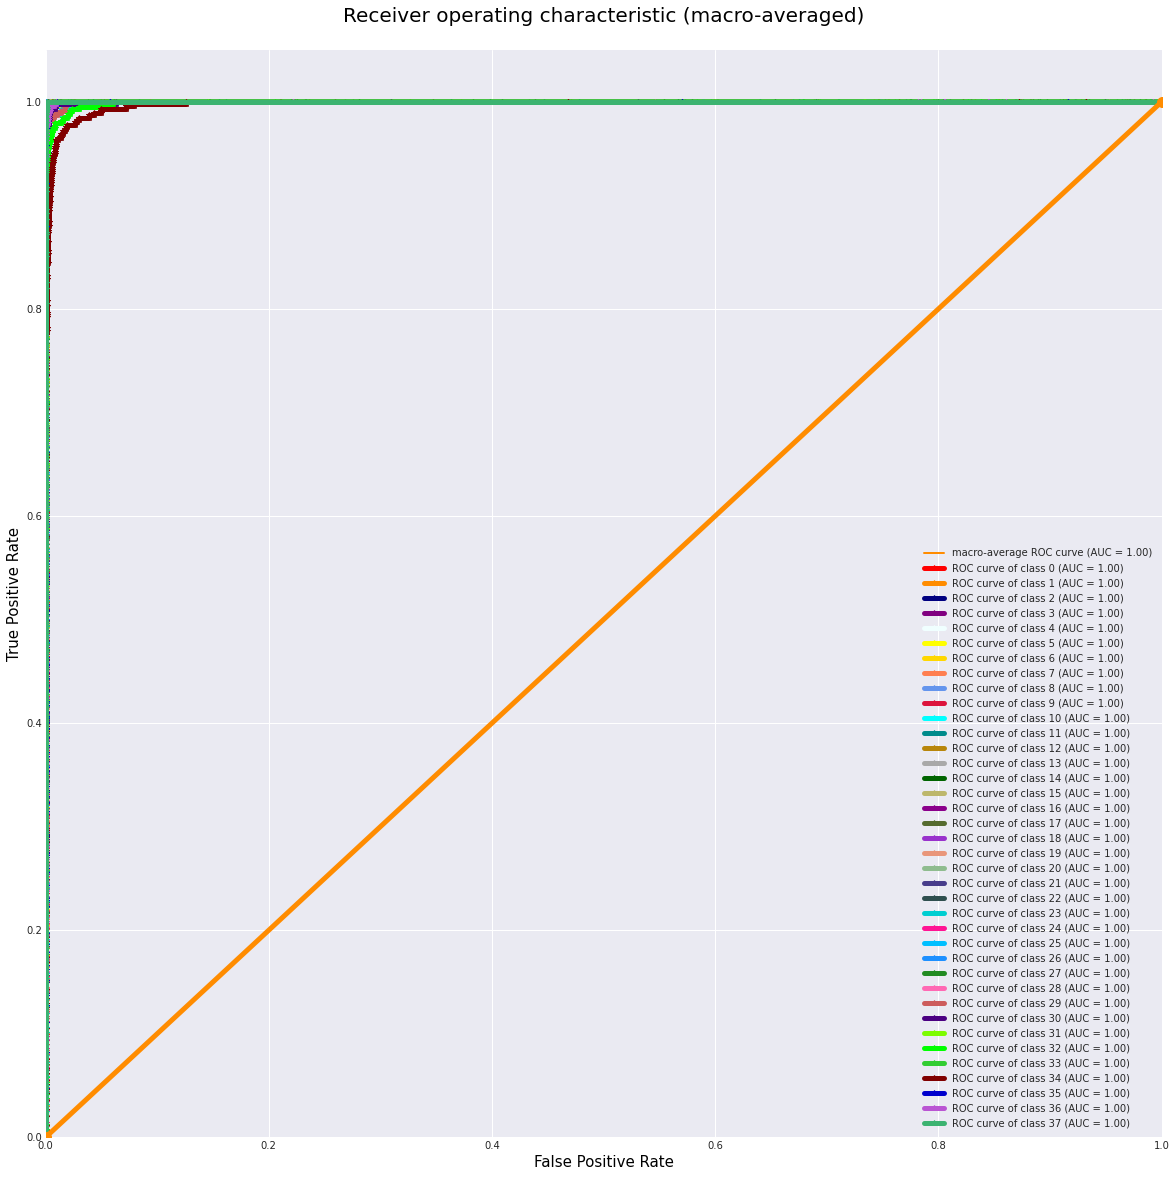

In [73]:
# Compute the macro-averaged ROC curve and AUC score
num_classes=38
colors = ["red", "darkorange", "navy", "purple", "azure", "yellow", "gold", "coral", "cornflowerblue",           "crimson", "cyan", "darkcyan", "darkgoldenrod", "darkgray", "darkgreen", "darkkhaki",           "darkmagenta", "darkolivegreen", "darkorchid", "darksalmon", "darkseagreen", "darkslateblue",           "darkslategray", "darkturquoise", "deeppink", "deepskyblue", "dodgerblue", "forestgreen",           "hotpink", "indianred", "indigo", "lawngreen", "lime", "limegreen", "maroon", "mediumblue",           "mediumorchid", "mediumseagreen"]

fpr_macro = dict()
tpr_macro = dict()
roc_auc_macro = dict()
for i in range(num_classes):
    fpr_macro[i], tpr_macro[i], _ = roc_curve(y_true_onehot[:, i], y_pred[:, i])
    roc_auc_macro[i] = auc(fpr_macro[i], tpr_macro[i])

# Compute the macro-average of the ROC curve and AUC score
fpr_macro["avg"], tpr_macro["avg"], _ = roc_curve(y_true_onehot.ravel(), y_pred.ravel())
roc_auc_macro["avg"] = auc(fpr_macro["avg"], tpr_macro["avg"])


# Plot the macro-averaged ROC curve
plt.figure(figsize=(20,20))
plt.style.use("seaborn-dark-palette")
plt.plot(fpr_macro["avg"], tpr_macro["avg"], color='darkorange', lw=2, label='macro-average ROC curve (AUC = %0.2f)' % roc_auc_macro["avg"])
for i in range(num_classes):
    plt.plot(fpr_macro[i], tpr_macro[i], label='ROC curve of class %d (AUC = %0.2f)' % (i, roc_auc_macro[i]),color=colors[i],lw=5,marker="*")
    
plt.plot([0, 1], [0, 1], color='darkorange',marker="o",lw=5,markersize=10)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',color="black",fontsize=15)
plt.ylabel('True Positive Rate',color="black",fontsize=15)
plt.title('Receiver operating characteristic (macro-averaged)\n',color="black",fontsize=20)
plt.legend(loc="best")
plt.show()

# Confusion Matrix

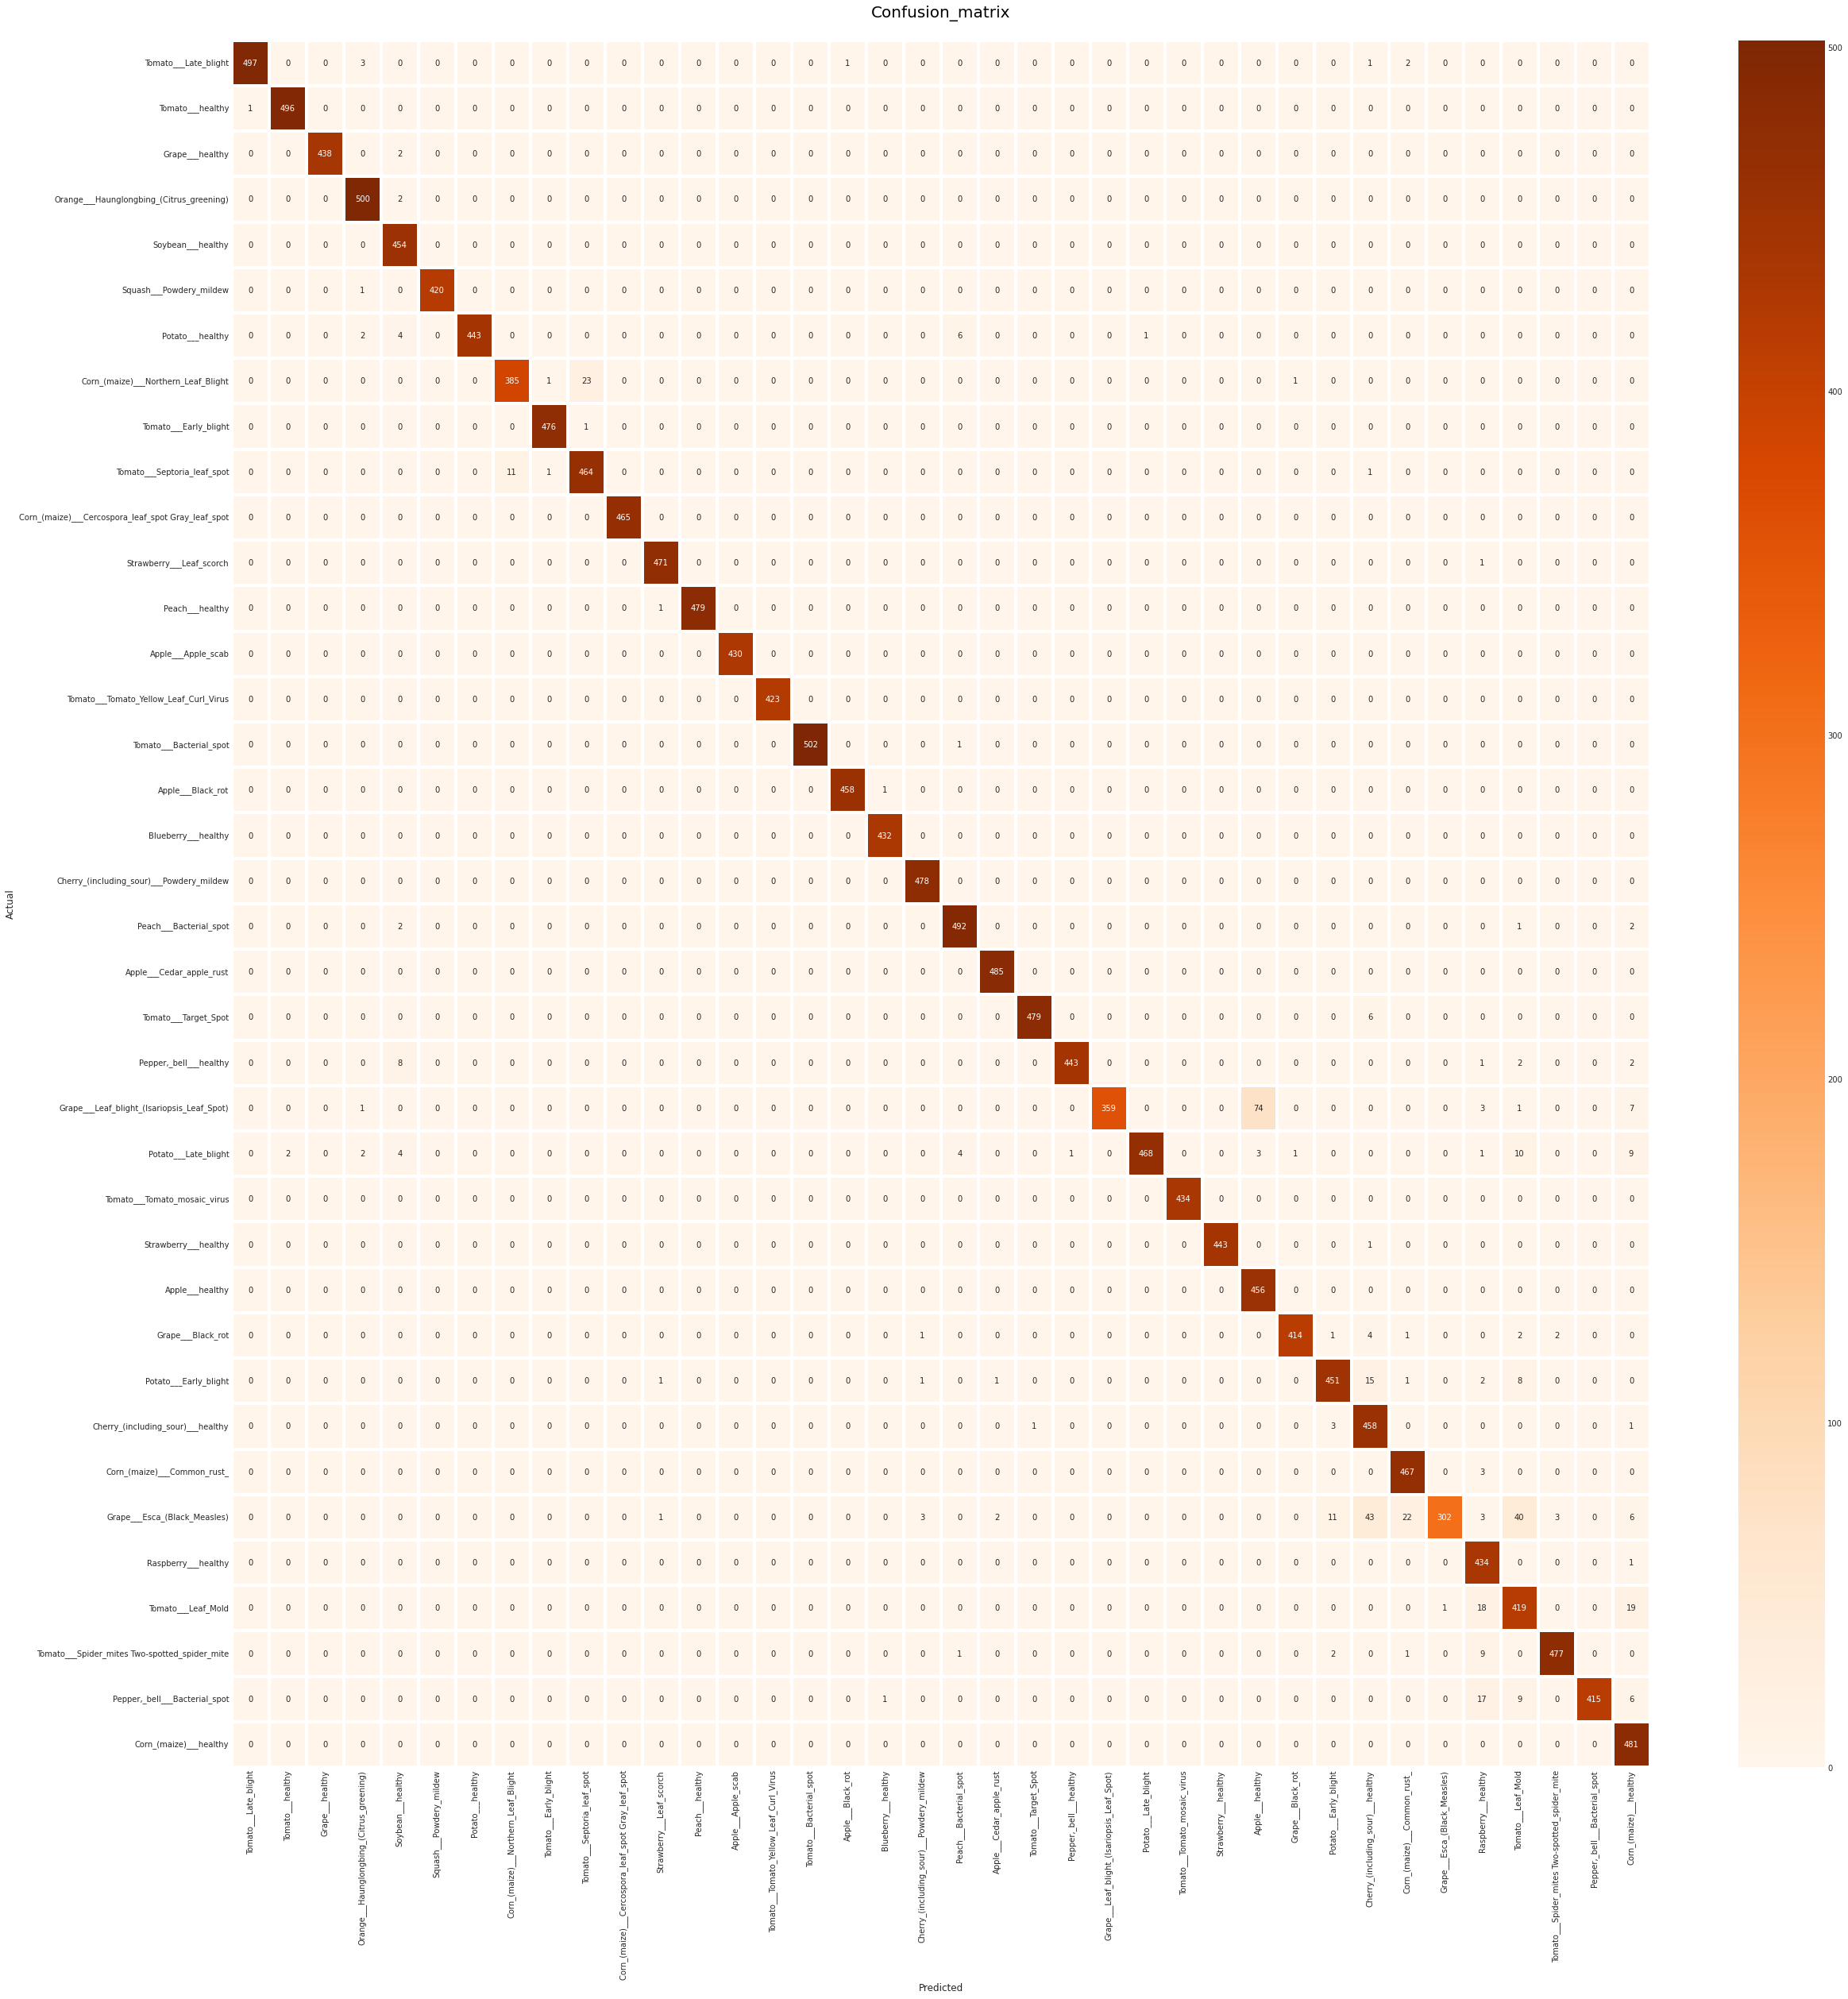

In [74]:
plt.figure(figsize=(40,40))
cm= confusion_matrix(test_data_generator.classes,final_predict)
sns.heatmap(cm,  annot=True ,fmt="d",cmap="Oranges",xticklabels=class_names,
            yticklabels=class_names,linewidth=4)
plt.title("Confusion_matrix\n",fontsize=20,color="black")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

# Classification Report

In [75]:
print(classification_report(test_data_generator.classes, final_predict,target_names=class_list))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.99      0.99       504
                                 Apple___Black_rot       1.00      1.00      1.00       497
                          Apple___Cedar_apple_rust       1.00      1.00      1.00       440
                                   Apple___healthy       0.98      1.00      0.99       502
                               Blueberry___healthy       0.95      1.00      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       1.00      0.97      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.94      0.96       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.97      0.

# Model Prediction

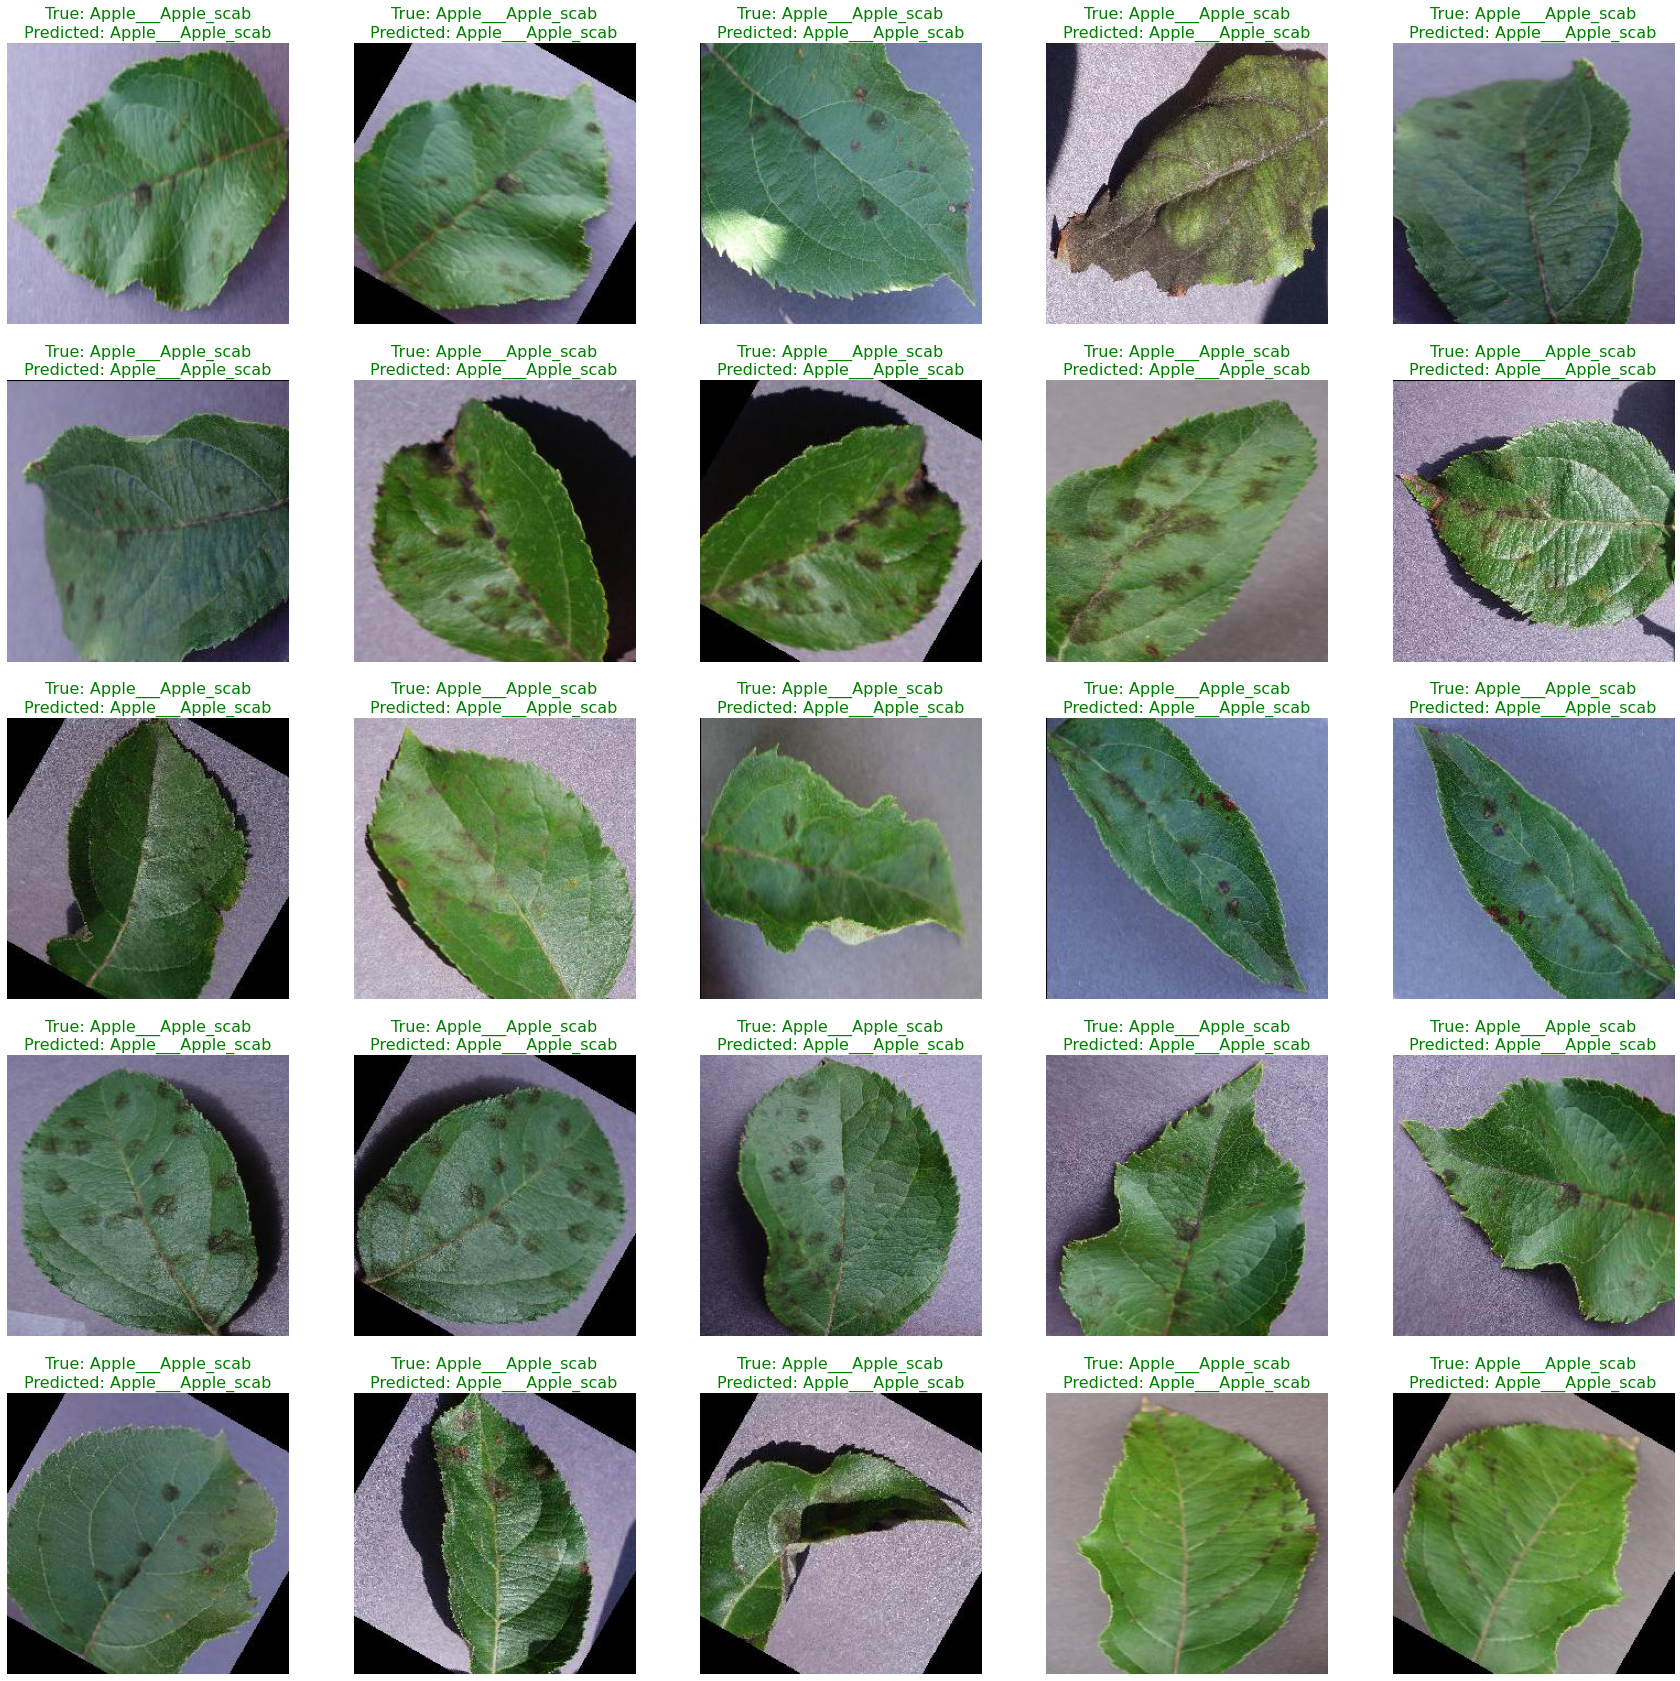

In [76]:
class_name = list(test_data_generator.class_indices.keys())

plt.figure(figsize=(30,30))
number_images=(5,5)
for i in range(1,(number_images[0]*number_images[1])+1):
    plt.subplot(number_images[0],number_images[1],i)
    plt.axis("off")
    
    true_label = class_name[test_data_generator.classes[i]]
    predicted_label = class_name[final_predict[i]]
    
    color="green"
    if true_label != predicted_label:
        color="red"
    
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", color=color)
    plt.imshow(plt.imread(test_data_generator.filepaths[i]))
plt.show()

# Predict Custom Data

In [1]:

from tensorflow.keras.preprocessing import image
# Set the figure size for the plot
plt.figure(figsize=(15, 15))

# Load the trained model
# model = load_model('/kaggle/working/my_model.h5')

# Load and preprocess the image
img_path = '/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust4.JPG'
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

# Predict the class probabilities
probs = model.predict(img)[0]

# Get the predicted class index and name
pred_class_prob = np.argmax(probs)
pred_class_name = class_names[pred_class_prob]

# Print the predicted class name and probability
print(f'Predicted class: {pred_class_name}')
print(f'Probability: {probs[pred_class_prob]}')

# Display the image with the predicted class and probability
plt.imshow(img[0]/255.)
plt.axis('off')
plt.text(10, 20, f'Predicted class: {pred_class_name}\nProbability: {probs[pred_class_prob]:.2f}', fontsize=20, color='red', bbox=dict(facecolor='white', alpha=0.8))
plt.show()


NameError: name 'plt' is not defined

# Read Images From Online

Predicted class: Peach___Bacterial_spot
Probability: 0.21859505772590637


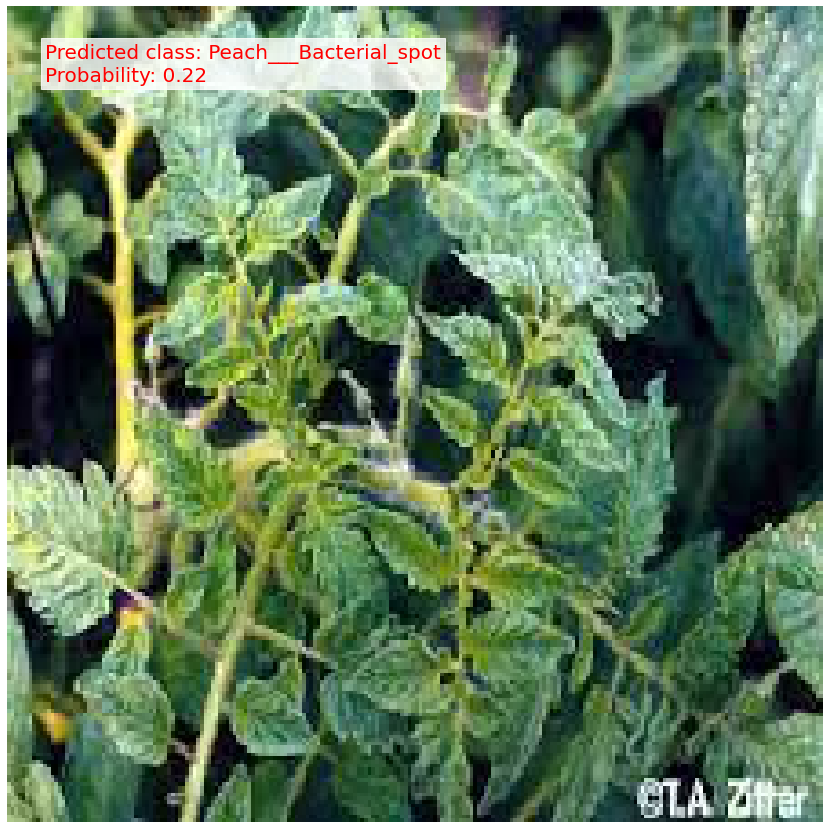

In [78]:

# Set the figure size for the plot
plt.figure(figsize=(15, 15))

# Load the trained model
# model = load_model('/kaggle/working/my_model.h5')

# Define the image URL
img_url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoGCBUVExcTFRUYGBcZGhwcGhoZGxwgJBwhHx0cHyMgISAcHysjHx0oIBshJDUkKSwuMjIyGiE3PDcxOysxMi4BCwsLDw4PHRERHS4oISgxMTMxLjExMTExMTExMTExMTExMS4xMTExMTExMTExMTExMTExMTExMTExMTExMTExMf/AABEIALkBEAMBIgACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAAFBgMEBwIBAAj/xAA/EAACAQIEAwYCCAMIAwEBAAABAhEDIQAEEjEFQVEGEyJhcYEykQcUI0JSobHRYsHwFTM0coKy4fFDc8KSNf/EABkBAAMBAQEAAAAAAAAAAAAAAAECAwQABf/EACwRAAICAgIBAwQBAwUAAAAAAAECABEDIRIxQSJRYQQTMnGRocHwFDNCgbH/2gAMAwEAAhEDEQA/AOuN9nTdlsPLAThmSL1hRk6SfFjQ8xSqMFKuqNzm4wsZ9e6q/aFSZkMki4x5iORuQbGAY78Dyq06cKI02GEn6ROKKrd2TDkz7YLZvtZ3OXQmnrqMJE7AcicIHH3bM1mrusauQ5RhsKnnyPUDGtQnwPjsWJt54qcXRKpNRIJ5jAXJcKrVG0U0ZiN4/fbDx2c7G1lio4U/wEmB5kjf0xoegbuctxTy3CqlYzSSOTapCn3iJwVp9iySpKESblSLftJxpa5OmtPUV8VNtJHlPIdPMYIZKpTI1qwYAWM3HkR++BZOxCGI1Fvstw+lkaTl7vUA8DwAY6eeJuPZUVx9tJTZUU29+W3MYJ8Wpd4NOkat1PL2HUb+2B+aouF8Qvpg2sDFm98URB3UR3Y+Zl3bTsucvXIpy1Nj4PKbgT+WPuE9mpPjXURczt+W5xoFCnSei1Sp4m7whQTcRuT5Wxep5dIBmFkEnoBhmLXXiT5MRK3CuGLQpLTA01XClyYEcwoHIDn1IwWXhFDMN9smsKJWSQOQ5ESLD5YGrWFWuNIPhJN/Pa/KcX3zYpuArang623A/hAkQBhVYMNTgKM+q5elk5FKmqa2UBV3Y9N7wt8D+1OWLrSqhA2moA6ECSpUht+hgx5YMZeutQ+LuyeQYEMvuD+mFTtP2jRMx3bLoCrdZv0mCf8AnAdTyDXKXqX37P0aqxpS8AQNvcXm2FbifY7ujrpszxfSRNvUb4c8jWpd19YDAU+dQGNJ2v0wWpsDRPiBJFnEXG1uU4gcjo2uvacFmV0siz20zivX4O4N1IGG3jmVOXHeo3xNGkj8x8sCP7SqkxAM2iOuLq5amEtjUXcTuL5RgyqqksTAAEknyAwLrKyMVYEEWINiPbGv5TKr3wcIpKD4jO5HLoQZ5Yzrtx3f1uqEGxEx+LSJ/PFkzB9QMwZtQMMyQpjFM0qhvJODnZ7hgqv4thy64cM/wWmEGlQBGCzhehAHAmc8NqVKbhgSIxqeXrA5daqCSwjCJn8qQYEG8CMP2UyhTL06WxAv79MSc8iIG3uA6OUOrWznWDNsSNTqhzWXSWidsEctwXmXMYKFqdMGBNrkxAwGBklO4rUiahZqhMzifhOXTv0MEkTc4G8S7QsahCABQY2388T8C4zU79FtpYwZAweJVaqH/lcGZXgTZjPupJ7tSWeCdhy9zjR/7NpsCrguoChNPhUQbeo5XOKvBGQZhhpBL7QQLgE894I2xe4lmmePhVXj4ZNz1npvjhZNe0oxsXAg4czeOBoV9MWuRuLHlIvgnQyg7sypg7HqRGw998F6dGmiAFgOUESYjcjFenRZtjCn8+kfLFi2tyJUeJ3WreFWgyQPTzwk8X4wVrsjRUSZ0ndfQ4H9qe0zZoImXNRAs7GNQIHLywpPnnBIJMzed8ZMeAEEnuV9XiaNnqi1EV1+GAojlHI4tcKoZaPtjUVQQfBp256pEx6Xwldle0PdNoqXptvP88HO1vD6z0jUyza6REsi7j9xiJUqwVtfPvH4E7G5o/Ba2Qd9FKogJgqkaT/pkCfzwczFRUbTed7kW9hc4yz6GMrUrM5qLNKlBRmF1a9hg79IfbQUHCUoaoLeg9ccGVX4Ab/mOcfpsQ5x7PeBU0nU7i+krZee8m8fPHFXJIQNLNTcqYK2gjf8j+eAfC+MHNCnWVrCxB3DfeTa8bz6YPZLMUywpsSCBBBNxO+++24xejdzMx8GWBnWWDNNrCQqSxt5f9Yl/tAlSXpqF6HePO8DFMOqwBJJBW28Wi8YX+1XE1ogJU8OoW3vETf3GLruLZhWkmVqEkI3n3ZkE7fe3OKIylAZi9abWpVGOgGeoty2OFTN9slCslIQSpXWZBAO+kcvXCxQzWswztv1wpxkxgfcTVuLZoUrlYLC7KBB5WItYYAVOLFSG75481V56zPiwL4PxmpSU03Pe0jvTe9vI9cdcT4OtRPrGTc1KQu9I3en77sv5jCKvE11/ecVvYjLluMUyQwqUmUXJDqpnoEJke8YX+3uVFd2roFdYUErdlgbuB+othbqgG5X98Gew+Qq1Myq0p0/+Sfh0HfV5Rywx0LJirs0IL7O9os1lnCUwKi3XuyJ1/wnr8sadTqqpK06YCiPCxLBTF1XooJ2H/XeQymTyZc0EVqs/GxnTbZeajlgZWztOhRbM1LhDKj8TfdHufYb4gciswAEq4IFXD3GOEVKsrpkAWuLeg9cLByD0qg1KwINvCd+W/nha7LcfqPUK1HYmox2J8JYyCPTDtSztdFcu7IAIUs0qTO41eWGUlbWtS6OFXcl4zVqZHJ96UBqMQFJv4jza4xj2eUu2q7OzTtdifIc8bjmqVPN0AKgUgQeomx/0+uBfZrs4mTFSqaeqqx8DGDoUclOwnrvjsbBAakbEz7h+UzFKH7mqBz8DftgtxTjE01VQSxGHEZoC9RrmfCtyfKxsPPFKvk6dVCaaaanIkR7bRjjksipOwfyijwDhOlxmK3wgyFJ5+mGHN8YpAF2qADphZz1YqzKzSFJm9pHTCpns21U6dlxVFN8jD+WvEds12yoAwpZsAuJcZrVzpU6UPJennhWzOXKG+2DnZijKFztMewxQgKLEpxULcs5bLi0wo/E2DXC81ldQVEYMPvsALxuL88VlIa20cuuCOX4epGoxFvPCOzCjIAz3h2aqNmUAUsSYiBPqOWHqougkgAaAAwaAQfLSY254U+zufVMyyssgoVXlFxceeGYlXrMGEAQscySJvzi+OBJMYfjPsuW1irUCsrA6ZvvuSCN+hwQyX2lXSABAt5W/Xpgbm6umEVFB0jSFMyQPywT7M0wuoneAST1MYa7g8zL+wXD111Kb/3lNvmDcYr/AEl8JSm9OtTAHeAhgBzF5x2nElGfpmk8d4vduRtI+Hf5Y77R1aubrLT0FEp7Tv5k4zryGTkfMsdbiWtInDB2V7Q1Mmwk6qfNenphqyXZGiaUGS0fFO2ETjPDmpVXpsCQpsYMH3xVuGUFWhVyDqfoXh+aptkjmKQADUywgReDv5zj86Z/Ol6jO92JMk42f6Icx3nCmRjZDUUz0kn9MKHZ/sPorjMVWV6YZmFODfeJnljFgZcTsD2NfuWc3Vz36MqdRadQuumk5DA3JJjTZAZKn8XkMOveI+iFDVFNjBBIG4GoyRvacU2zCuV1Ko0kLYHwgbCQBzO2OqlAIZYMD11Hl943tz28sXVi3qOpjyH1ahzLOC6E/cBsPOw/TAbtfkBmcrUU0y1QHXSKmPG3hA/y3vNhAwT4TmZUqYJC2dYkjzgb+mJqVVV1kMEVVEu3K3K92w33ADd7i0RMRzvCa1ME1KTKsxPIH1BwN2Nsatwvhj1CxdyKTFtJK3qIb6vIbCTuTgnluzORoEP3Kuxv9pLHf8JOkGTsByxQ5xdeY4PkzKOGvUayozj+EEx8hg7lhWyjLX0tT1kxqtOmJEb8+Yw+vmS5hBpE2UQoAteBEDcnGa9sOL97WIRppUxpQ8m5s3udvIDDXz0YoO9Q/VyNHNkZiiQl/tqY68yo5E9NueGTguY7ui1DLU+7DTqc3M7Ak87wMBOyfBjSyBzFQhe9IeLyEAOkDzJM+kYF5rtRUCslJBTBBUPJLQeY5A4yFXe1U2BKE8TcuZLhzU6pJzVBW1Q9ySYO0FbEYl7U8LzFVIp6KlNmhQrgxzgLaTbCcjE3Mm9ycPXZjNAqUJ8Qjuw1heSxn8VsWOMr6hVj4i8x1KXYnICnQYPS01tbAsykOsQIBItYfng//ZrOpZhYDwixgfoTzOClHOHwgkEEAw39W9sT1aiVFAXw+RFp8oOFU2bPmK49ov1cjUp1FqLTZ20kEEwOknT+lsFuG5utZRSIBiUe4PmD1jHOZNVCqLpk9Pnb9MS0gjU2apU1ODA0yIjks3Pr1wxQg6ihqk9bK0nVigKNBlTuBzidxhW4xl2TWUDOCsgrM/LBuvpB1osm2o6pI6898Rh9ZLpIqMLcgw5gjk364TgA1iMGB1Ml4g+usifdO+LGYyAp20j164540g+u1GQFRzVgRpbmL/1fBItrpBG3AlTijkgipQkVFjiKg2xPw/NulPQu2q1tsQ5kEEziThw8V9hjSBqKTqFMpYyxucG8tWamsSCJ2wGpkAyR6Ynoub6toth+IIqRuHOB5RKmco6tiSWAm4ANrXuYGGvOOiVGD0wDFjY6RyEi8+vPCZ2Xz/2yOFLEyoA3vYbecYae0VFRUpCwH3hJ5XNzF5xmf0mpVdrI8u2moKrWtYDl/wAnDBklii1QwNRt7D9yMJHEM741AhQeUzubn1OHjPVlXK0yCCCsfzwA2jOmLZbgGZqAtTpPK+JSQRcXm/phyyvDqlalSzNIT3q6qnVWFiPmNsE+xfHO/pPUqnxJYqB8gMBeCZw0KuZyssAHNWkOWl9x88R5O5NjYl2KhTPaXEawfQxKqLeZ/wCMS57jVGmrGoykhTCtBJ8oxR7a53RTpsxKksRI52v7YT6vCWrzUp1A7G8EwcHgDttSaAkzRvod4qa65ih3aIrfhBHxAxzwZ+tIKjUGdpHhLASB6XF8AfoOyFSmMyzoVMqPEI2BwGq8YFPidWnUYLT70EE8jb8sZAOWdlXrv/yaci+gGOfEs1SpIGYoEUgMzrt5+p98A37e5To5JIECnpIvclg0Ec9sR9uqyPlyodXZ2CrBmbzPtgPwfsYKoUEtJG4/qw88beSqKaYxXmOmTzmXUd+alOmbEBdRY+ZPhHsBj3tLmKZp96ZcOQaKBIAaAZJm0G8nlywKfs5Sp00pNmGYqpgKoYAzIBMyYnmB5YJ9lsiyF6LgvTHiWo9kDiCukHcdbcjOMeRkuwY6AmxCtCmxJfZTGkGBYXjTaBf8sQ1OI011qzqzLMohpFjuYA1Ezfy3wr1e1Gac9yADUkqw03LSRAjlHlhSzrPrqajFQMZI/ECZj3H5YbDgYdtOJBjT2i7YhXWmQ60ogoN1BG7GSWeTJGwA64o5PgtHM1aSo1KCw16HF0ufhkkNsOVicC6WXfOoaToxqKPDURCR6PAj3w1/Rz2bfKUaleqmmoTAU7gAkC3mTPpGLOSqaux4/ccKLuTfShxkIKeWp2A3A5Af1+uEui/uOmPYqZzNVWYBAphtViokgALcsT5YLZns6VK9zUWrIEqbGelrel5xTDxxqFJ33J5dmC2ToIB2xbUEAENEXsf54iD6ZVtxNjuI8sDOPZtkVFW0iW88aeXtJBSx1HHJdoIpsalKpUCCDUp3InbV788Hsq6sKenVpeDrEmNyCDEeXyxj/CuKVaNZa9OoUddiOfkRzU8wcaTwH6RaNXwZkvRcwAyXpzNjzKediPPCOntKHGYw18wVc6iTptY3NtwOmOckgYwC2g3BgefpfB2jxBigddLAybMrBhvYjw/n7Yqs9JtMrAUgeCwIYwZi0i9xzGJcR1cQieJlkZfs7lWg2E+k7g+XninmsnpYKEJY+IQb+UmIkRHzGJeH1AveU3BBLRPPb4xHUXnri/QqzGoaoJBIMGQYm14NjG2CqA6nVETt/wALqSmY0AALFRrSbjSbbmDvhbc+ExuBjVuLUadSm1GqAKezEyJi4hgJEGDbocIbdmHS1SopnbuwXnb0/PphykY9RK4gOfXHnDaigkHmMMmc7NK06KthYhlEq2wBGq0nCeLEg4op8ThsQ4XBETP8scrXIGmbXxS4Y4giZb9MS8yekYopkytGGuzmaNOvSYW01EM/6hh343xAOz1ElwRFhYXkn1jnjMstmvFEb4eK9T7FCBJheXKLx8oxn+oo0RHSwKgvOVjUdZIsdIFrC9rbjDJm80NIX7tMHbyOFHh1aa94AuY8h/1gq9UMxWY1SR5zzxnuqjV5ih2S40tCuAx8DkBvLocG/pDzSpUpVqc608LnkVN4/rrjOQcElzdUppJ1LEeK+NnHdrLFN3DHbjjIrmiqmQlPxf5jv8hhfy+YemQyMVI6YhLcscajg8RVRgKFTbPor4w+ZpNq+KmYI6yLHCh2o7O1audrMqhU1SXcgDbz3wb+gUQ2YvuEI/PEnFcnUzHGKdGqZozqZZgaQCTPWYj3x4iWn1bKhA15mhqKAmD+zHYt+9H2yMNM2DQAeYO3LbGj5HL06K92L2Bn0G5g8+nLCvx3j9HL1wtSoQGuvdqugAE2JmQbRiQ8eEipThiRZnJYL5AbX642FC22N3MWQm+qhl0AYOwC33eCY6C25PyHrj3O1T3VRoJWEAaTcmTt8/ngDVStUYs0+bNZfl09MX+IZ6m1EUhUEArsDuBFj74yZMaLTE7v+Icbd3B1bMigBmBT+1qxT1NMKRI28wJ84xL2S4QKYdqyIzGoWbVB5WPOAdRxFSU1NVGoWemRKt0O4udjHXEC8RzFQtolEGlBTUXJW12jUSABOOtqIU17n48AQkjRIjd9bqIAtOmqryX4Re9o5x1jFPiHGUoLqq1kprNxF552QMWwr5ltC98HL1EYDUTKwLPp9JifIjCd2jzjVKzqLwAfmJxpwcnNE/uIVs7mm5jN0aqLULCotRfCwVgSpsLm4vgXk27qoWpowSPCfCT7gDGf8M47Wy3gUq6Ag6XEgbbGZX2wVTtouolqTXP3XkL5gECTir4nLe8Q4/aNvGaH1pPChNVfEDIvFyP/AM/nhS4v2fqV210HSohOm8oVI+6dQifkMO/Y/iCV6FauutIhdbgCLTIhiOeEbM8SbLZyq9B0dXMspGpTN4ItcdRhsYKnj5jqvEQfl+x+cb/xaVkDWz01W5ixLeLrbFit2IzdMuxplwlwyQdYmJW8nzESMOXCe0WXzFOGKUKiyTqqaf8AUpMBhtY9MEMzn6isDKtpkSv+6NwR6bRh3zFO4ObRF7HcXZNVE13pJJJhdQB80PKd4vfDSKGZRi+tSrMGVgwCuATNrQZ5EDEXGqKVMvUrLpUrpqwAOfhYfNp9sV+zD/WKFTLPykjadLXMehE+oxmyurKXEKj1RgTMO+Yq/ZlDTpKuvVvBBBP3SpXYXsZx1X7W06bFaSFmAMktY33mJJHpi88rTFNaiU6aoF8YktAiSWMG0WjEVLurBRSMjxFQII6zHQbYRMlnkIzAAQbwjtClcxXqGnUn4TBSoCbfGpg8jHriemlNqeqnSAWdLKYsZ2PK4khhY+RGAv0hcFC0DmKKEsuktoNgnN4jba42wm0u1tdaDUPvTK1dRDLcGDyO0e53xtQEi5MJyFiPvaSqqEO1DRTGnVVptqIuPiQgEXgAy2M64xUR69R6YARmJULMesNcTvHnirm+N16p+1qM/rt8hAxD9YXfFlWowVgJx3ppuGHvg0pDLqVtxywFrAPiXJ1dFj8JwxnOvIa7hMIRN5w39l82Sppn7uxP4TuPY/rhUoOGgg2wf4eQjqwiOY8jviGQ2JMXcN8R4GpBZfCWBPuL36YpPlmp09bgLpIIM/P2ODRzQSlqd4hTqnaZwhdoOMNVcKCQmyjr5nzxIY7qMDcTkF8EszXXugoHvgcgxcrglRG2NomqVIvjunT64+Cc+mLJg3wpiEx++g6qRmKqzui29z++DP0i8MqfWqdaixLoy61QNKgmZNtjEW64AfQpH11x1pn9caVxWsO/LBzrRLqDebRq5FYx5LtjX6o2N0Ny9jgLmVfSVl6aZt3cs0gEJEBQRt88VOyuZohWqVKqIysBTpsTEWloAg3tc2g4ce1fDRnF+0MVVMCoBYg30wPM7+eBfBfozLl2qVkVd1ggm3OOnLGxWRlrlImn0IcoJ3ukGurl/hAYQfTcjzjEwSlSO3eNMRPwkD7xaR52k7Ac8BKr5Xh0mis1SIFQiSI9PhBwpUeO1Vq1KhhxUbUyuJBPUc1aOY/PGP8A0heyLrx4uDgF/c0J1q1Kyq6U1pEEHu3ut5DGd2BAsBeSMVcwe67xgTAB8pJEX6EEYh4bxGhVUaKsMwPgbkd4uLYsZumTTNOZmzANeTF2noLYzkMCFZai7gPI8RNV+57sBAkDn6zyvfAXtTm6aOKSySI1lSNukxvHPlglx/h1SlBp02F9AKFjJn7xB+IzYCBgDmuzWcWGfL1PFewmf/yTGPQw415cgdTlGty9mOzoq0BmMoWdfv0mvUQ8/hA1KPSfXCzUQzBGHLs1XzOUDr3NSHiCFMg8sUu13CagYZqxp1RqBC6SD95WXkwP642CwahE0TsgKacNSjMd4rsZgG+1tpAGM3zuSqNUd6aMy6yLCTPoLx7YNUKdSnkKEtd6rsYMwoEASNhbbFPh/HlFQrUEIWBFRd0YCNVtweY98QDMCxG9xWgRcq2qCrDyII/XD1wvidNUVaiOhAA1I02A87yY6nF+vXkAVAlVIDBoBsdiOgjngLx3JIF72k8AkeDeBe4JO1tsR+8uQhW1JEHuHVp0sxTfu5CwSyN8TabjyueQxVCGhT7pFAqVCGYxOhdwAeWKPZdD4qtRtNNf4oDH+YH64L8Q4nllBJcO7wGIGliCeXoBM+WIMvFyqix/S5VfxswNxOlm6tIhVZ3O3OB84X1x92NzeYpOaebXTTWQCw8WoQbfiWCQfXc4NUK471aay8rqUyIO4URtuI9sEqPdVyBUpeKLAmY8x0viivY4stCITU7aovgVIehVQ3WCIa8SeRDRFsZT214F9Vrwk908mnquRBAKk84kX6EY0F8gci7LH2bg7AAMJtI2DA4mzWWpZukyFlaPEuoXUz0O4IJBid8a8bUKiK3E/EyXg3DGr1lpKQCZJJmABubXPp54tdrOEplmpojs5ZCzEwB8RAAA9Jv1GHfJcFpUqorBQTSkyoMSBG3O5xS7YZGizd/UL28CqCBJF+nIk3xX7gjjL6h7RARMXctS1WjETUxJiYm3pgrwhAPG3LYYLNq453LK00pqoC4uJmRa0qOm+KlSoDc4C8VqkOGUkemIhSxuLx5dQxx/ibMNJawMwMCMlXmqp6XxWzNTVfHmReCTioWhUYLSzmtRVNIMkkA/PEgB0Fh8IME9Mfo7OcFpVQaNSnTamAukMoiBHlb2jHv9np417tQALNC+JR90j7wHntiA+pAHzH5T84Uqdp5YlGSqimKppt3Z2ePDuRc7CSOcY2HjnY3LZhWhBTqbq6eGVMXKr4SwnpjrszlHoZfuGUBqRelUB2a+oNHNWDKw3sThmzACwILFRb+hbLgZuTvob5Y0Tj9Kk1QEDx2Db3/DIHU4W+EZOnkatV6caqviWdqVMAEzz0BpPoAMO+Rp0xSmQ5eGLcyd58h0GPMz47yc7llpkqI3EeHPTvOxGxjboNwPI+2Jq/HEcadEMAxA8/vCeWwPvifilCWfQ02MkDUBuPFY3/bC1mqagyzjqGB39iZAnHMLAJ7Exm1NTnjvAFzLrVptBclWB+EkQAQR1IOOuDdgkY6qlVWAJBVQdx5k4npZnQEESRIB6g9D64u8LzTKCvwoCYPXrjh9Vk6EtjomjD2U4PksuoIRBpvqa8fyxX4ytOqBWpFamgnUUIsNJ3G7C+wk4XeMVAWD1H1Kvw0hPibqeuJ8tVrOvibTTF4tb0iOe2FYv+TGzGZ1vjUkNSpSpvopJUFQkENJEeQ5+kjcYqJlaQKFAyVR8S0yQo6AyDt7Yv0cyCxIqFmRdRiOYIjfyj3wOrtVZCFQKIIFOm3ia+xsb331YVOZNDX+e0UwrWr1dDWLlREB1Oo/hIMEf8jEr8RFRBQq5YBTeCIuDYzNm+fvhLyqLQJbu6yH8RUkTPoAb8/fDHwHtAwGlSjjyC/odojHoICo2CfkQKb8yv2wyFRaKOit3dMMpBj2PL+jjM1vfG61OMa6Wh48VmAgRGxtzwvnsDlagmnUZD53/T9sOufGnpYkGMUJ2IicD45VpQurXTX/AMbbEeRiQfy8sNOSrrm01BBSCsFN5JHUtAB32jpiNOyVGjVIq1Gfw6lCgqG3kSbyI2GLeQztB1amCyIPB3XdNeN9JG4II88QzkP/ALYs+4iqlHcp5yg70u4pKCuoBI+8qwWYtMASQvUnVaBOKFXgTMwYV0dgIVSCB0s1xMcsV+LcQqd8Gp/Zoo0qFtYNzHWfLDBw+tSrICwCVYAbcAkWmRYSL+uFvJjUV/37xWKkwZmqT0lVSpCg3YCRPXUOnTDLkuJLVC6wKZLDm3iJmRI+Enf2xWOUqpdPEOYNwfIm42xBUsCShQrPg3HqvWOnTDI/PvuQIqMSVdJK1EYobbyDNufznlgXXyEFFVfCSAC3L+R9sCKXFKimUYj3tfy2jEtHidS5LFlkagANzsR/xjQBx3BYM7y1OahRmY6CbHaN/Q+WB3axA1BdJ2qzHMLpYT84Hvg7TpgqYB1H32AB/rywF43UVaDqXRSQIUm8BpiRzth1EAOxEzMCLDFkvppX57YrN4jbEfFKs+EcsUmnueNmdhivmXnfECtjmq84eMF3PWfH1E4+prIxZoZU8wR0HXHQtQn6WzDtTeWaFaLnkQoB33B6WOKeWqMKjK1tUwvmNiJ8reeLVHL09YaNTciWn5EzI88QcQpkNcU6aC7M51T1CrG/njyVZgeJ/mcQDuRNKkBokREDe36HEWfZSKjAgN52uOR8wCRixWyqVqepSyDk5kX6gEzHy9MDeI8PqiSumodMSpg/JuceuKXEqCcymp1reEsKdSmxn4tTKVtH8L4vqgNGn9o6hVgqGjzuDzvhdzxYMikaPHJDSDYTEe354v5WtUNEs5ASNRMibnyEbWxM6AjYyeW5EucpUA4VLsSZN5Jtz39sdVqiFRqZUaBPeSd/KenLCrm+L06mcRN5ZRt54L9pUqOraELFhci3Pz3w7K1gHz5jZAG2ZZJpBSQwYTJvZQDdhFvQY8qZsNpDTTUg6f3P74G0MmEy9Og9TU5hmgzBJkjzAFvniDtW4pCk63JJDTsRAhT0NjiX2l5cV794ivTVCbcPeoyjvCAL6l/DzHrjrtFmyBopozNYBVBPlyFvM454TW7vL944YBvEobciLL/3iMsvd94pOp+cgx5Wi2JEsG9WwJQgdy9whu7pSzK3iI0qNzAJBgnUb/IYs1J+KmVCnkVU7i4Ekf1GA3CM99pSoaFgB9R+8SAx6WuAOeL1FyqaiZUgbRYz77A74r9oM1mZ2cynxOu1NWZlraR8TmyesIQSPmMVCKdTxvSEkDx02ZYEb2N/Ug4J5syCCQbERIAM9RsRgTw/OU6M0ahApsZUqW8FoKkETom46Y0AGqXUSwZZyVEA6qVWoD0qQwn1EGOe2LeW49UpECoq+KYK3AAN+hm4jHmY4c1mSIIGmDM+dsV3pkq1NxIYQREHff1B54kcxBpxYlFJ8QzxLNrWFKspHgIBAuwJsbC2159ccDMLUbQigUzOu0M/SIiDfnfFLg9MIxAWASOZOwJm/n+uK/GKjVayCie7NM6atRCdO2xQ+HULXthceQK5KnX9JUWRvuWuIZKjV1lKTpUUSC3wmN+W/villqJUAtZBck7n/jBgLTWlAKFx8bkRPksXn2jfFfM06dVO6d6dT8PgewJ6iP0wxz8hv+YpRblLvysNTkA/xGPkLYhPEKlx4z5deWKDcGqUg4TUUBPiVw4EnmN4/bEKCsAH1Wj8Qn3AxoxqtaIkXXct1E1GNJBi4a0eh5YuZBGWzC4YHcE36xY3AwJydTxTUlxzvgtlKaiU1C4tJ5AGNpMxh8l6UxFWFKTszWJA5dI/WcJHbivpq90IIEMTMmTO/T0wxZ3i9KiB3hYlh8K3PrJMe4wofUDWqM+nQhM7yfz5nFEB7MfGK2ZTyjkCTiHMUnIL6TA3MWwfNBKYUAC3MicSZzLPVpBKYm4m8COpxQMO4wfcUTU8sFeD8ArV0Z0EBRI1W1n8CDdmPlbqRhl4D2aWmyO+mozbCPCv8UH4vIx1wxUcuq1P7whlPMfCTflsJAtiTZwTSyrZAOor8H7FuvjrOAPwJdgYnxSIH57YbcnwOnS8SPqMgMSfEZHK3wja3nixQzw+MOGvcwdwZk7++CuXzC1FCmAd12HhOomI3E874k1t2ZP7gP7ih2T7TNl3GVqU3eq0qulhYn7sNYA9VIxoAIC6wqgiASwb4uknzt7YzX6TeB09DZpDBVgpWNwYE+UYD8F7V1aYXvV74rZGeo4KC1hvbrafPbDjEpFiOTyFia/nuIT8euowjwUwNC7bs1icU0z9Ri5cCmqgHSvigTuW6+QnAvL8fpdyhqVaYTmAwne5APiI5gRyGAvaLt/TC91laTExerVtedwnMxsTETthftk9CILaXe2HakU82mXqUu9RVBeRpcFgCCjfehTF7HriPj1KrVy+rJhaqRLKfDUXoSh3jpPpOBvYgVc1nGz1XSyUgqkwN9JCoq7GAJv188OXeIyVXp0gjidLdYEkbWxnyumN1XjZ971NSBONsdzNOzPBHFbv64ZVpnVp2JeZVTO3Mn0w25bK1Ks6m3MgNO37ReMfUeMq5AqrIj4xyIkC3ocd52s7rppkaecEyfLeI8sB3d331IOLFwDmXBrEIQFUwrRE+cYL8RyoqijS0HSGLknchR6feLDFIUqaFWeVO5ET/wBYYsmgCNXcaRpkAn7okj3vPvhSWu4qJuLna/MkgU1vaI8vL9MCuGcRNNe7dQRJsNwIj06c8Gq+QpVmZ6VdQ5sA149wf5YG5vgVdSSyyv4kuPyuPcDD4+IXiYX5A/ElpsrCVYB2U3uDcR+mCIdu7IYafDYWiABv8pwotTZ69NabBXYEmTYQDc9LDbDPWzyqopAd40CSdto2HKbwegxTjxIEmQCJ3QeVBYeHSCGMAbee+A/F1QgqoB5gz+kcse8RrayBOoKLwPM8v2xOvDigNZyFUDw05uTynpPriikdydEQPwfjlSk6sCagUEd2zHSQRHtE8sMFHtHSbSGpsDp8TCLN5Dp5k4APwhDUUK4UkXVRIEbmWaI98SUuHtSXXUUzyEfmTsfbByIj9yo+IxcE4o9TMAaFFLUdwSSIsPI+fniPi3Gky1co9KmweWJQw2/MRBJn8sVuznFDUfRpUCLkECwv0knymMePwOiXZ2uWZjAsILTB6mD6YyNjxq9MKFdSocgRg+ppURaitKsAQZkXGxjbpiqeEt4gs+x59De3O+2JqGapU7QFVYkIIkiIURuLCeXLHtbidFwVdQQbBN2J6yvw8ueETEoOjJO1yjVp92PjKRvB22g9d8c/VWcak0te7QJIj7wXHma4chpMqVNDEggPBiJtIN+l8Bz31CpTaWXUVGrk19uk40KgN8e4AK7hmlk937s6h90Tp9+Yt1tbfAriWdC1JRiGEG4hlI2G1+vzwbz70q50VWNOpvTqKYLXuCAYMdD1wJz2Qqau7qPrCXVokx06x5Em+2HRgdsY7LrUhqO9QKzKtraiFEDnf1x7WVQpKknebQI3tNzi3eNb+BARC9OlsCeK8Q1Nba+3yAxVHLHQ1IsJDm38UC4wa4S40MsXeIG06QbTtNwb9MCMrliYdyQDcQJJ9OnqcFqMqQFfSV3gEgne/XHOwIInVUu5KJLMxUwAAOQHKIxLlswve1QZJKqQRvJJ362H54D0WksSSYuWNoF7k/8AeBWW4vpzHeEwGP5DYnzsMTVLXUKg3HFOFEeKm5Rt43/O3yvi/Qo1VbdXJvCkroPUTtPMTilSrK67M5a4ANo5YJZUOY+FFEDSNz6nDAKRqADe5Y7R5QVMtVWx1q5HtcfnjHqNElgTONh4nmYUiLaY6RPl6YTP7PgkiiWS5kXIHWML98IKMugvqLHEdlk/nizlOAV6sOKfT4jE9Lb4u5bLBay1QFcIZFN+fr+vthz4DnKbUtSqytdWDANf3i0Hfzw/3R0ITyA1LLaMvQp0KepEFhCwXJN21Gwkm5HpjvM5o08vW0oWCJpEA/EVMn2m+I6OfqIwDxE7iTB69Ftv88dVc4LMGJU73O289PY4gyry2JIE+8TOEVgVIIJ5/wBeWJsxmnWCsAeV8EONZam5epThGX4kUQrjeQBs0GfPABKgY2H9eXnjglsSICajR2XRs1VFOEmNXi2sQPUHHXbriGkigp2F4Hz/ADwU+jygKdCrmGMA2UkdDH5sfyGAVek3eVK1VdV/CDdRzkwf6vhfTzs9CWJPDfcU6NdBPeSYa0enPB7gecqGn3gqsizpURJMEXg2CnF7QlQ/aLSYjqqkj0CiQPKcdtl7whDMACUtt0HT/L+eKOwYaG5IGoM4hxwLmmp1svTePgqL4XKMJF+dreUEYr0atOrqakXWLEOI9tQlSffFPteQM3zAREB6ixP5A/lhjq0UWnKAaROmB+fqZJJxXhoX3UZ21KeTyp3VAI3JkifY+I+QGLlCuLEkMQ1iQoK2Hwodjzv1xWr5w6tLUlKiCAtpB5874tUWpMLOFG8OAp9BNh7dN8AgiSB9p1Uzsj+8ZgRtEe0rynEGXBb7Nk7xNQK9VPlO6nYjngquVW5BUxyBBAtuSLk4sZVAsEAk2Mx1G/Qf8YgxI2O5RfmCOGZOl9YVzUpK1PXqRQJIIgWWYIPXHmTrioHLBNSuV0qZsLz+vyx3T4eiP9mAKlQkm5axMmTcAzyHTFTP90KmsU2SosSyGCxA6bYmVVzTk/BlCdal9cmv3lgciOWIxQSVlNrSII/f29MVqeaqGNDhgPxTMHkVG8dRiOs8EAMSfwyf1Nz74so49SBhL6mia3MGASqwJPkfO2+AuSzVSuzKVVaasraQI1NPhE9BEyBgjm66U0DVGiWAE89Ik3674VstxZ6asQPETqBHL26fzxWiQa7hAqWe1rfbJTX/AMayb/eaCfSABi9w3iLrly9Qa1DBVkSfO/liLLcMXSGqajVYyzautztzvzxNn8p3gCU2Ap0zpYHmbEmdv+sAMpXj7RxY2JNmOHUqw10asGJ0M0kdfMfngWOHBVao+mBYCbWxfy2UYU6rGUKC0covA9euOK9Vu5UVQCGNrXFrE+o54NMBV+YNGRVImCwAgSdhYbjlGOKjFYGuOkxG297x54r5xHUaQCyxN777RimNTsARqJsBggRStyLj+adgoBbS0ggEQYjpf2NsC8tl6tRgiqzNyAH9Ww58M4cNJ1AOTtIkATJJn5YKpnqVCi2inFQzLDbYwYN94thhkC+kdyytQqC+zNT6sCmYrIhnwIGLMp2gxZRfDclNiCQQTHIT13PtvjIKyOzkkFmYkmBMkkk2GGLsx2pfLTTql2pkRH3lvMCblTtHLHOh7EDY72I9ZriAkOQCZkg9BsML3CO0xy+aqI16bOYn7pJn5Yv1z3lUKJv0EwOvKBAwN7QdiXNIVKFTvGILMrgCecKRz5QfnjOETIOLQ42KNYlvimdo1HZqYVmW8jF/K5rSqkETYwRYjp6YQuASgC2BYyx52tpP64ZctX1bGyximPCuJeN3+4mfIWe44ZTLpWQaEGtdzAtPlvHngfnMgQbeI/wrp/cYGDNmm4KsQQOVoB3Hp5Yjz/atkUd4neX6xPmQBBPrjuHtEu5xSJQuyeJgpgHmeV9vLCZlcxWSqtFkJcsAFYQZJgX6Sd8Fe03aQVk7qkjIp+IsRqMXA8IgCwwU+ipa2ZzApuwanSHeBnAYqRsAfP8AljkUopJmhEFbjR9IWd+pcOSgpAd4WOsXP74VOxHFlqgZd/70EkE7MpIsP4h06DH30xcRFXN6AfDSERPMwen9Thc4ZwI1EFQtoUzptMkTfeyzzxyYlOP1eYW41HzMZAliCpjcEc+oI/Mc8V6WVYMyrKGOQBDDyMW9DgFw7iGbRfHmXtyMMRFt2BxJmeOZwkBK7mTsFpz8wmCoF1MpU33CPE+FNX06gQ6wA5MyPwnnPT9sQcP4pTBOXYEJsp3g+Y6eeK3F+JVKdMUmqM1VhLNOw6DA6hUaoCGExs3P/nB2fV4EbjqjGJ6SNqIfUUkAAbgRBHlNv+8VM2jsIKkSTy6xFhijRaANJM9RuMSZmpVY61Z1qGPF6RvFotghz5iULkb5FxCCppBa5UmARYyBva2GLuAIRBUcwIZm5dSJEDywovRctpkqzMA8cyfvb4ZKnEgKaUqSlosSTFo3J6nAdeQjwlwVwlR45AyZ2j9cUE4nTcnWNLdIkHzB5YmyKmjTkgl2I1HaOYjCd2krNSzDqp8J8YH4Q149sSXHbERlthUZKmZhgyqBpFmJuf2/njrJKWbWRYX9T+08sDlRtCM7BSVBK3sTe/TEmfzi0l7sHxm9vuz/ADi3viqrUSpD2jzYqVAgGpKYgTzb7xt529sVMtw9nvYAXJ5D/nH2TpFjME/zwdpUSsLaT4jHIY4vWhCTO+HJJn8MCfM/y5zj6orU/FSI17aCBDg/zvPti5wpQykzYSAMDs+ra1IeyAEWkTJM/n+WFVdwSds0DUXLEhoJarGwgfDP4QTf1xBxOogGtvGZkKLCbAeoAxNkiCzvTps7BfgSmSb8zpG09cLucatVk06NR4Yg6EZgvUGB8Q6YpV9QqtmT0KdZ6nftUCJaBHxfwgeX4jgjl81qY0u7AT4dQJlhHX16dMLDZys4NNEcFdTMFBJA+8SAJUdemGvhrr4WABCosdSAN/c45lruO5Kzv6oSBoIAAgQL/l0viPKZQFtNUt6Tf9JOLfDRXaqqDL1dMkwUYTe0Ejczguit4S6GASrWNo+96bz6YRgexFu5FwrI0qbTTpfaDdheAf8AMfCfTBZ8krlSyKZBtZjvF98UQskAWImLwG9GHLE2RYgkGmIEQ0kxN79flhLJO4CTK/FMq3eCqhhjq1IRAYlYjyM36HBPJVw2X0wNQ3HQj/rbFrivwN6YXeyPxVf/AGj/AG4gNysB9q8oord9TIK1ILAcngSPQ7+s4q8NkeIEnkRi9x3+7P8A7D+uKHCtvfGonQmY9yTNZmXI+WAnaCtLBel46TghW+I/10xL2i/w6emLooq4ydxa4W9IVQawZk8v5wQSPQjGpdgQlKjUzVNFSmVkGCC2md5JvvzxkX3v6642Hh//APCX/wBOIfUdD9zWIi8Nyf1io+arAlGewmA5nY3nSBE4YMo4qPJMQdN941QAB6YHcD/wdL1P+44tcI/vaXr/ACwuQ+rj4mZibqCs1TJrVAPxv/uOJstSFNWqt8KifU8hjuj/AHlX/wBj/wC44i4x/hW/9gxw1AO4vV8wXcu25/qMS5bNaT5ER/zikcdJjXxFVKND+V0vswJ6bH5Ym1Qbk23E7evlgDT391/UYPZ74v8ASMZ2FGpIiQ8RB0kqQ2mDbnBkj5YpZfjI7xVFNVQlQZJmJHyxa+4/p/I4WV3HqP1xYKOMfFsbmk5qp4RAEEsDI6eXTC1xjIr9aWozg0yuu5H3SAU9Jj2nDXX+Gn/X3RhR7c/+L/X/APOIpp4yd1OczxYX0CSfvct+Q6Y94ZkGf7SodKc2PPAXK8vXDf2g/wAKvt+mHyniKEYKLkVDNq7ihSEAnSCPzPpAOCrgBWOrxEiB16DyGFzsx/f/AOhv9pwwV/8A5H6thWUL1JtOMzXWlTCiC5nYzAI3I9cAVqVF+BiB05fLHec/xFT1/kMcNsPXFlAqJ5j32QzhqZRUpMgqqzawVLwe8QqzIviZTTDKG2Vp2mcfNxp1rZ1aeYhhkCW0PCnMAopdfERrC6VJknwm53xnJ/fHFbl/XIYaWBqaJ2Dyy5Fa1bN1qVKtUrJTOv7TVTGmrUHhm7h41G1r4H5vhK5PvULhqfe1O6IcMCigHSBJMw433OEPJbn2/UYn4Z8S/wCYfrhTCxsTbsuM3SGVRnFSmzo+ZqNVEKCQEp0/FMKYJI3wSTiNMU0MUmQUKxmSbLNt7hgL898Ypmtj/qw1cH/wi/5X/niY6i8o75DKZSpl6bLTQ02CNqUgQxZSy6jUkASRpjbADj2ZUV2NOmFVGKDQdwDvM7/ywq8D3f1/bF9dm9cMVFSZYz//2Q=="

# Download the image and save it to a file
filename, headers = urllib.request.urlretrieve(img_url)
img_path = os.path.join(os.getcwd(), filename)

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

# Predict the class probabilities
probs = model.predict(img)[0]

# Get the predicted class index and name
pred_class_prob = np.argmax(probs)
pred_class_name = class_names[pred_class_prob]

# Print the predicted class name and probability
print(f'Predicted class: {pred_class_name}')
print(f'Probability: {probs[pred_class_prob]}')

# Display the image with the predicted class and probability
plt.imshow(img[0]/255.)
plt.axis('off')
plt.text(10, 20, f'Predicted class: {pred_class_name}\nProbability: {probs[pred_class_prob]:.2f}', fontsize=20, color='red', bbox=dict(facecolor='white', alpha=0.8))
plt.show()




NameError: name 'plt' is not defined